# Initializing necessary Packages

In [1]:
from data_pipeline_utils import Database

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib  inline
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Loading 

## Redshift

In [2]:
# Initialize database objects
mdm = Database('mdm')
awesomo = Database('awesomo')

In [3]:
# MIA Devices Attributes
df_mia_redshift = awesomo.to_dataframe(query='''SELECT * FROM SUNNAVA.MIA_DEVICES_VAR_V1 ''')
print("Shape: ",df_mia_redshift.shape)

print("Number of unique assets: ",df_mia_redshift.asset_name.nunique())

# Filtering to Wallboards
df_mia_redshift_wb = df_mia_redshift[df_mia_redshift.device_type == 'WALLBOARD']
print("------- Wallboards -------")
print("Shape: ",df_mia_redshift_wb.shape)

print("Number of unique wallboard assets: ",df_mia_redshift_wb.asset_name.nunique())

Shape:  (43585, 21)
Number of unique assets:  36156
------- Wallboards -------
Shape:  (13916, 21)
Number of unique wallboard assets:  10308


In [4]:
# NON MIA Devices Attributes
df_nonmia_redshift = awesomo.to_dataframe(query='''SELECT * FROM SUNNAVA.NONMIA_DEVICES_VAR_V1 ''')
print("Shape: ",df_nonmia_redshift.shape)

print("Number of unique assets: ",df_nonmia_redshift.asset_tag.nunique())

# Filtering to Wallboards
df_nonmia_redshift_wb = df_nonmia_redshift[df_nonmia_redshift.device_type == 'WALLBOARD']
df_nonmia_redshift_wb.rename(columns={'asset_tag':'asset_name'},inplace = True)
print("------- Wallboards -------")
print("Shape: ",df_nonmia_redshift_wb.shape)

print("Number of unique wallboard assets: ",df_nonmia_redshift_wb.asset_name.nunique())

Shape:  (2077251, 22)
Number of unique assets:  45207
------- Wallboards -------
Shape:  (1007953, 22)
Number of unique wallboard assets:  19958


## Treasure Data

In [5]:
os.listdir('../Treasure_Data_Variables')

['NONMIA_Devices_Campaign_sponsornames.csv',
 'NONMIA_WB_interactions.csv',
 'activity_variables_mia.csv',
 '.DS_Store',
 'old',
 'MIA_WB_interactions.csv',
 'activity_variables_nonmia.csv',
 'avg_sessions_nonmia.csv',
 'avg_sessions_mia.csv',
 'MIA_Devices_Campaign_sponsornames.csv']

In [31]:
df_mia_activity_var1 = pd.read_csv('../Treasure_Data_Variables/activity_variables_mia.csv')
print(df_mia_activity_var1.shape)
df_mia_activity_var1.head(3)

(31860, 14)


,asset_id,avg_campaigns,JUNE_avg_video_dispalys,JUL_avg_video_dispalys,AUG_avg_video_dispalys,SEPT_avg_video_dispalys,OCT_avg_video_dispalys,NOV_avg_video_dispaly,JUNE_avg_video_duration,JUL_avg_video_duration,AUG_avg_video_duration,SEPT_avg_video_duration,OCT_avg_video_duration,NOV_avg_video_duration
0,W01E123544,2.6,0.0,0.0,0.0,0.0,347.681818,0.0,0.0,0.000000e+00,0.0,0.0,6.962007e+06,0.0
1,W01E123544,2.6,0.0,248.0,0.0,0.0,0.000000,0.0,0.0,4.966034e+06,0.0,0.0,0.000000e+00,0.0
2,W01E123544,2.6,0.0,0.0,27.0,0.0,0.000000,0.0,0.0,0.000000e+00,540723.0,0.0,0.000000e+00,0.0


In [32]:
df_nonmia_activity_var1 = pd.read_csv('../Treasure_Data_Variables/activity_variables_nonmia.csv')
print(df_nonmia_activity_var1.shape)
df_nonmia_activity_var1.head(3)

(89508, 14)


,asset_id,avg_campaigns,JUNE_avg_video_dispalys,JUL_avg_video_dispalys,AUG_avg_video_dispalys,SEPT_avg_video_dispalys,OCT_avg_video_dispalys,NOV_avg_video_dispaly,JUNE_avg_video_duration,JUL_avg_video_duration,AUG_avg_video_duration,SEPT_avg_video_duration,OCT_avg_video_duration,NOV_avg_video_duration
0,W01E118505,3.0,0.000000,230.956522,0.0,0.000000,0.0,0.0,0.000000e+00,4.623820e+06,0.0,0.0,0.0,0.0
1,W01E118505,3.0,0.000000,0.000000,0.0,367.681818,0.0,0.0,0.000000e+00,0.000000e+00,0.0,2000586.0,0.0,0.0
2,W01E118505,3.0,122.409091,0.000000,0.0,0.000000,0.0,0.0,2.450443e+06,0.000000e+00,0.0,0.0,0.0,0.0


In [33]:
df_mia_activity_var2 = pd.read_csv('../Treasure_Data_Variables/avg_sessions_mia.csv')
print(df_mia_activity_var2.shape)
df_mia_activity_var2.head(3)

(37825, 19)


,asset_id,jun_avg_timeout_sessions,jun_avg_Crash_sessions,jun_avg_exit_sessions,jul_avg_timeout_sessions,jul_avg_Crash_sessions,jul_avg_exit_sessions,aug_avg_timeout_sessions,aug_avg_Crash_sessions,aug_avg_exit_sessions,sept_avg_timeout_sessions,sept_avg_Crash_sessions,sept_avg_exit_sessions,oct_avg_timeout_sessions,oct_avg_Crash_sessions,oct_avg_exit_sessions,nov_avg_timeout_sessions,nov_avg_Crash_sessions,nov_avg_exit_sessions
0,W37627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.928571,NaN,NaN,NaN,NaN,NaN
1,W01E112183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000,NaN,NaN,NaN,NaN,NaN
2,W01E112088,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_nonmia_activity_var2 = pd.read_csv('../Treasure_Data_Variables/avg_sessions_nonmia.csv')
print(df_nonmia_activity_var2.shape)
df_nonmia_activity_var2.head(3)

(102727, 19)


,asset_id,jun_avg_timeout_sessions,jun_avg_Crash_sessions,jun_avg_exit_sessions,jul_avg_timeout_sessions,jul_avg_Crash_sessions,jul_avg_exit_sessions,aug_avg_timeout_sessions,aug_avg_Crash_sessions,aug_avg_exit_sessions,sept_avg_timeout_sessions,sept_avg_Crash_sessions,sept_avg_exit_sessions,oct_avg_timeout_sessions,oct_avg_Crash_sessions,oct_avg_exit_sessions,nov_avg_timeout_sessions,nov_avg_Crash_sessions,nov_avg_exit_sessions
0,W01E134273,NaN,NaN,NaN,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W01E104159,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W01E107291,NaN,NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_mia_activity_wb_interact = pd.read_csv('../Treasure_Data_Variables/MIA_WB_interactions.csv')
print(df_mia_activity_wb_interact.shape)
df_mia_activity_wb_interact.head(3)

(77974, 3)


,assetid,anatomy_model,avg_touches
0,W24171,Artery Blockage,3.478261
1,W01E132666,Neck,1.500000
2,W01Y100598,Insulin and Glucose,5.000000


In [42]:
df_nonmia_activity_wb_interact = pd.read_csv('../Treasure_Data_Variables/NONMIA_WB_interactions.csv')
print(df_nonmia_activity_wb_interact.shape)
df_nonmia_activity_wb_interact.head(3)

(239838, 3)


,assetid,anatomy_model,avg_touches
0,W01E100289,Teeth,2.454545
1,W01E103383,Spine,1.000000
2,W01E112004,Stomach,21.333333


# Data Preparation

In [12]:
# Creating Asset_ids and MIA/NON-MIA devices

#concating asset ids of both MIA and Non MIA devices along with the respective flags
df_final = pd.concat([pd.DataFrame({'asset_id':df_mia_redshift_wb.asset_name.unique(),
                                   'y_flag': pd.Series([1 for x in range(df_mia_redshift_wb.asset_name.nunique())],
                                                       )}),
                      pd.DataFrame({'asset_id':df_nonmia_redshift_wb.asset_name.unique(),
                                   'y_flag': pd.Series([0 for x in range(df_nonmia_redshift_wb.asset_name.nunique())],
                                                      )})],
                    axis = 0)

# Converting flag to categorical datatype
df_final['y_flag']= df_final.y_flag.astype('category')

print(df_final.shape)
print("")
print("Distribution of Test & Control:")
print("")
print(df_final.groupby('y_flag')['asset_id'].count())

(30266, 2)

Distribution of Test & Control:

y_flag
0    19958
1    10308
Name: asset_id, dtype: int64


## One Hot encoding

In [13]:
df_mia_redshift_wb_2 = df_mia_redshift_wb.copy()

df_nonmia_redshift_wb_2 = df_nonmia_redshift_wb.copy()

In [14]:
df_mia_redshift_wb.replace(np.nan,'unknown',inplace=True)
df_nonmia_redshift_wb.replace(np.nan,'unknown',inplace=True)

In [15]:
## Replacing unknowns such as nil, empty, APK not installed to Unknown
df_mia_redshift_wb['software_version'] = np.where((df_mia_redshift_wb['software_version'] == '[APK NOT INSTALLED]') | 
                                                  (df_mia_redshift_wb['software_version'] == 'nil') |
                                                  (df_mia_redshift_wb['software_version'] == 'None'),
                                                  'unknown',
                                                  df_mia_redshift_wb['software_version'])

df_mia_redshift_wb['facility_type'] = np.where((df_mia_redshift_wb['facility_type'] == 'Other'),
                                               'unknown',
                                               df_mia_redshift_wb['facility_type'])

df_nonmia_redshift_wb['software_version'] = np.where((df_nonmia_redshift_wb['software_version'] == '[APK NOT INSTALLED]') | 
                                                  (df_nonmia_redshift_wb['software_version'] == 'nil') |
                                                  (df_nonmia_redshift_wb['software_version'] == 'NOT INSTALLED') |
                                                  (df_nonmia_redshift_wb['software_version'] == 'None'),
                                                  'unknown',
                                                  df_nonmia_redshift_wb['software_version'])

df_nonmia_redshift_wb['facility_type'] = np.where((df_nonmia_redshift_wb['facility_type'] == 'Other'),
                                               'unknown',
                                               df_nonmia_redshift_wb['facility_type'])

In [16]:
def one_hotencoding(data,var_list):
    ''' Function for one-hot endcoding categorical variables  '''
    
    df_categorical = pd.DataFrame()
    for column in var_list:
        curr_cols = ['asset_name']
        curr_cols.append(column)
        
        df_curr = data[curr_cols]
        # dropping duplicates
        df_curr.drop_duplicates(inplace = True)
        # Get one hot encoding of current column 
        one_hot = pd.get_dummies(df_curr[column])
        # Drop column B as it is now encoded
        df_curr = df_curr.drop(column,axis = 1)
        # Join the encoded df
        df_curr = df_curr.join(one_hot)
        df_curr = df_curr.groupby('asset_name').sum()
        new_cols = [column+'_'+str(x) for x in df_curr.columns]
        df_curr.columns = new_cols
        df_curr.reset_index(inplace=True)
        # dropping a column to avoid dummy variable trap
        df_curr = df_curr.iloc[:,:df_curr.shape[1]-1]
        
        # Converting all 
        cols=[i for i in df_curr.columns if i not in ["asset_name"]]
        for col in cols:
            df_curr[col]= df_curr[col].astype('category')
        if df_categorical.empty :
            df_categorical = df_curr
        else:
            df_categorical = df_categorical.merge(df_curr, left_on = 'asset_name',right_on = 'asset_name')
     
    return df_categorical

In [17]:
categorical_vars = ['software_version','manufacturer','model','sku','state','is_battery_charging',
                    'facility_type','ranking','specialty']


In [18]:
df_mia_redshift_wb_cat = one_hotencoding(df_mia_redshift_wb,categorical_vars)
df_mia_redshift_wb_cat.shape

(10308, 156)

In [19]:
df_nonmia_redshift_wb_cat = one_hotencoding(df_nonmia_redshift_wb,categorical_vars)
df_nonmia_redshift_wb_cat.shape

(19958, 157)

In [20]:
# Dropping these columns as only one of the cohorts has data 
columns_to_drop = list(set(df_nonmia_redshift_wb_cat.columns)-set(df_mia_redshift_wb_cat.columns)) + list(set(df_mia_redshift_wb_cat.columns)-set(df_nonmia_redshift_wb_cat.columns))

In [21]:
for col in columns_to_drop:
    if col in df_mia_redshift_wb_cat.columns:
        df_mia_redshift_wb_cat.drop(col,1,inplace = True)
    if col in df_nonmia_redshift_wb_cat.columns:    
        df_nonmia_redshift_wb_cat.drop(col,1,inplace = True)

print("Shape of MIA Devices :",df_mia_redshift_wb_cat.shape)    
print("Shape of NONMIA Devices :",df_nonmia_redshift_wb_cat.shape)    

Shape of MIA Devices : (10308, 150)
Shape of NONMIA Devices : (19958, 150)


## Free Space Percentage calculation 

### Percentage calculation

Free Space % for any device at a time is derived using the below formula 
    
        Free Space % = Available Free Space on Device / Min Free space of all devices of particular device type 


In [22]:
df_mia_redshift_wb_fs = df_mia_redshift_wb[['asset_name','free_disk_space','min_free_space_by_type']]
df_mia_redshift_wb_fs.drop_duplicates(inplace = True)
df_mia_redshift_wb_fs.drop(df_mia_redshift_wb_fs[df_mia_redshift_wb_fs.free_disk_space == 'unknown'].index, inplace=True)
df_mia_redshift_wb_fs['fs_pct'] = ( df_mia_redshift_wb_fs['min_free_space_by_type']/pd.to_numeric(df_mia_redshift_wb_fs['free_disk_space']))*100

In [23]:
df_nonmia_redshift_wb_fs = df_nonmia_redshift_wb[['asset_name','free_disk_space','min_free_space_by_type']]
df_nonmia_redshift_wb_fs.drop_duplicates(inplace = True)
df_nonmia_redshift_wb_fs.drop(df_nonmia_redshift_wb_fs[df_nonmia_redshift_wb_fs.free_disk_space == 'unknown'].index, inplace=True)
df_nonmia_redshift_wb_fs['fs_pct'] = ( df_nonmia_redshift_wb_fs['min_free_space_by_type']/pd.to_numeric(df_nonmia_redshift_wb_fs['free_disk_space']))*100

### Quantiling

In [24]:
def label_row(row):
    label = str(round(row['fs_pct_quintile'].left,4))+'_'+ str(row['fs_pct_quintile'].right)
    return label

In [25]:
# merging both mia and nonmia devices data to have uniform buckets

df_redshift_wb_fs = pd.concat([df_mia_redshift_wb_fs,df_nonmia_redshift_wb_fs],axis = 0)

In [26]:
df_redshift_wb_fs['fs_pct_quintile'] = pd.qcut(df_redshift_wb_fs['fs_pct'], q=10, precision=0)

df_redshift_wb_fs['fs_pct_quintile_2'] = df_redshift_wb_fs.apply (lambda row: label_row(row), axis=1)
df_redshift_wb_fs.head(3)

,asset_name,free_disk_space,min_free_space_by_type,fs_pct,fs_pct_quintile,fs_pct_quintile_2
1,W01E103730,2.11036e+10,12419072.0,0.058848,"(0.0261, 0.0613]",0.0261_0.0613
2,W01E121534,5.034e+10,12419072.0,0.024670,"(0.0245, 0.0249]",0.0245_0.0249
3,W01E121356,5.17263e+10,12419072.0,0.024009,"(0.0239, 0.024]",0.0239_0.024


### Bucketing

In [27]:
df_redshift_wb_fs_bck = df_redshift_wb_fs[['asset_name','fs_pct_quintile_2']]
df_redshift_wb_fs_bck.columns = ['asset_name','fs_pct']
df_redshift_wb_fs_bck = one_hotencoding(df_redshift_wb_fs_bck,['fs_pct'])
df_redshift_wb_fs_bck.replace(np.nan,0,inplace = True)
df_redshift_wb_fs_bck[df_redshift_wb_fs_bck.asset_name.isin(['W35734','W01E107035','W01E124992'])]

,asset_name,fs_pct_0.0196_0.0239,fs_pct_0.0239_0.024,fs_pct_0.0245_0.0249,fs_pct_0.0249_0.0257,fs_pct_0.024_0.0245,fs_pct_0.0257_0.0261,fs_pct_0.0261_0.0613,fs_pct_0.0613_0.0661,fs_pct_0.0661_0.0672
4571,W01E107035,0,0,0,0,0,1,1,0,0
15532,W01E124992,1,0,0,0,1,0,0,0,0
29568,W35734,0,0,0,0,0,0,0,1,0


In [28]:
df_redshift_wb_fs_bck.shape

(30256, 10)

## Formatting TD variables

### Grouping activity variables to ensure single record for each asset

In [37]:
df_mia_activity_var1_1 = pd.DataFrame(df_mia_activity_var1.groupby('asset_id')['avg_campaigns'].mean())
df_mia_activity_var1_1.reset_index(inplace = True)
print(df_mia_activity_var1_1.shape)
print(df_mia_activity_var1_1.head(3))
print("")

df_mia_activity_var1_2 = df_mia_activity_var1.copy()
df_mia_activity_var1_2.drop('avg_campaigns',1,inplace = True)
df_mia_activity_var1_2 = pd.DataFrame(df_mia_activity_var1_2.groupby('asset_id').sum())
df_mia_activity_var1_2.reset_index(inplace = True)
print(df_mia_activity_var1_2.shape)
# print(df_mia_activity_var1_2.head(3))
print("")

df_mia_activity_var1_f = df_mia_activity_var1_1.merge(df_mia_activity_var1_2,left_on = 'asset_id',right_on = 'asset_id')
print(df_mia_activity_var1_f.shape)
df_mia_activity_var1_f.head(3)

(8001, 2)
  asset_id  avg_campaigns
0  DW03756       3.166667
1  DW04037       1.000000
2  DW04090       1.000000

(8001, 13)

(8001, 14)


,asset_id,avg_campaigns,JUNE_avg_video_dispalys,JUL_avg_video_dispalys,AUG_avg_video_dispalys,SEPT_avg_video_dispalys,OCT_avg_video_dispalys,NOV_avg_video_dispaly,JUNE_avg_video_duration,JUL_avg_video_duration,AUG_avg_video_duration,SEPT_avg_video_duration,OCT_avg_video_duration,NOV_avg_video_duration
0,DW03756,3.166667,368.727273,347.608696,488.0,486.681818,523.863636,454.900000,7.382498e+06,7.169849e+06,9.888454e+06,2.684611e+06,4.158682e+03,5.858350e+04
1,DW04037,1.000000,0.000000,0.000000,0.0,0.000000,82.944444,83.578947,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.660882e+06,1.672496e+06
2,DW04090,1.000000,0.000000,0.000000,0.0,0.000000,85.000000,83.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [38]:
df_nonmia_activity_var1_1 = pd.DataFrame(df_nonmia_activity_var1.groupby('asset_id')['avg_campaigns'].mean())
df_nonmia_activity_var1_1.reset_index(inplace = True)
print(df_nonmia_activity_var1_1.shape)
print(df_nonmia_activity_var1_1.head(3))
print("")

df_nonmia_activity_var1_2 = df_nonmia_activity_var1.copy()
df_nonmia_activity_var1_2.drop('avg_campaigns',1,inplace = True)
df_nonmia_activity_var1_2 = pd.DataFrame(df_nonmia_activity_var1_2.groupby('asset_id').sum())
df_nonmia_activity_var1_2.reset_index(inplace = True)
print(df_nonmia_activity_var1_2.shape)
# print(df_nonmia_activity_var1_2.head(3))
print("")

df_nonmia_activity_var1_f = df_nonmia_activity_var1_1.merge(df_nonmia_activity_var1_2,left_on = 'asset_id',right_on = 'asset_id')
print(df_nonmia_activity_var1_f.shape)
df_nonmia_activity_var1_f.head(3)

(18604, 2)
  asset_id  avg_campaigns
0  4916125            3.6
1  DW03531            1.0
2  DW03763            3.5

(18604, 13)

(18604, 14)


,asset_id,avg_campaigns,JUNE_avg_video_dispalys,JUL_avg_video_dispalys,AUG_avg_video_dispalys,SEPT_avg_video_dispalys,OCT_avg_video_dispalys,NOV_avg_video_dispaly,JUNE_avg_video_duration,JUL_avg_video_duration,AUG_avg_video_duration,SEPT_avg_video_duration,OCT_avg_video_duration,NOV_avg_video_duration
0,4916125,3.6,0.000000,259.900000,259.095238,517.045455,555.500000,564.789474,0.000000e+00,5.203883e+06,5.235405e+06,3.748206e+06,0.000000,1.120526e+06
1,DW03531,1.0,139.227273,138.173913,138.523810,131.619048,0.000000,0.000000,2.784908e+06,2.765181e+06,2.772615e+06,1.035549e+06,0.000000,0.000000e+00
2,DW03763,3.5,400.772727,238.739130,386.666667,383.363636,483.681818,515.578947,8.244569e+06,4.776599e+06,7.961103e+06,1.004831e+06,2740.181818,9.146474e+03


In [39]:
df_mia_activity_var2.replace(np.nan,0,inplace = True)
df_mia_activity_var2_f = pd.DataFrame(df_mia_activity_var2.groupby('asset_id').sum())
df_mia_activity_var2_f.reset_index(inplace = True)
print(df_mia_activity_var2_f.shape)
df_mia_activity_var2_f.head(3)

(8473, 19)


,asset_id,jun_avg_timeout_sessions,jun_avg_Crash_sessions,jun_avg_exit_sessions,jul_avg_timeout_sessions,jul_avg_Crash_sessions,jul_avg_exit_sessions,aug_avg_timeout_sessions,aug_avg_Crash_sessions,aug_avg_exit_sessions,sept_avg_timeout_sessions,sept_avg_Crash_sessions,sept_avg_exit_sessions,oct_avg_timeout_sessions,oct_avg_Crash_sessions,oct_avg_exit_sessions,nov_avg_timeout_sessions,nov_avg_Crash_sessions,nov_avg_exit_sessions
0,DW03756,1.0,0.0,0.0,1.272727,0.0,0.0,1.428571,0.0,0.0,1.222222,0.0,1.0,1.166667,0.0,0.0,1.6,0.0,0.0
1,DW04090,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
2,DW04538,1.0,0.0,0.0,1.000000,0.0,0.0,1.500000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [40]:
df_nonmia_activity_var2.replace(np.nan,0,inplace = True)
df_nonmia_activity_var2_f = pd.DataFrame(df_nonmia_activity_var2.groupby('asset_id').sum())
df_nonmia_activity_var2_f.reset_index(inplace = True)
print(df_nonmia_activity_var2_f.shape)
df_nonmia_activity_var2_f.head(3)

(18592, 19)


,asset_id,jun_avg_timeout_sessions,jun_avg_Crash_sessions,jun_avg_exit_sessions,jul_avg_timeout_sessions,jul_avg_Crash_sessions,jul_avg_exit_sessions,aug_avg_timeout_sessions,aug_avg_Crash_sessions,aug_avg_exit_sessions,sept_avg_timeout_sessions,sept_avg_Crash_sessions,sept_avg_exit_sessions,oct_avg_timeout_sessions,oct_avg_Crash_sessions,oct_avg_exit_sessions,nov_avg_timeout_sessions,nov_avg_Crash_sessions,nov_avg_exit_sessions
0,4916125,1.5,0.0,1.0,1.0,0.0,0.0,1.400000,0.0,1.0,1.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,DW03531,1.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.0,0.0,1.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,DW03763,1.9,0.0,1.0,1.6,0.0,1.0,2.555556,0.0,1.0,1.25,0.0,0.0,1.428571,0.0,1.0,1.5,0.0,0.0


### Pivotting interactions dataframe

In [43]:
df_mia_activity_wb_interact_f = pd.pivot_table(df_mia_activity_wb_interact, 
               values = 'avg_touches', 
               index=['assetid'], 
               columns = 'anatomy_model').reset_index()
df_mia_activity_wb_interact_f.replace(np.nan,0,inplace = True)
print(df_mia_activity_wb_interact_f.shape)
df_mia_activity_wb_interact_f.head(3)

(6981, 269)


anatomy_model,assetid,ABCDE Moles,ADHD,ALS,Abdomen,Acid Reflux,Acne,Acne Detailed,Acute Bronchitis,Adam Insulin,...,Uterus,Vaginal Birth,Varicose Veins,Vasculature,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist
0,DW03756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DW04538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,W00604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_nonmia_activity_wb_interact_f = pd.pivot_table(df_nonmia_activity_wb_interact, 
               values = 'avg_touches', 
               index=['assetid'], 
               columns = 'anatomy_model').reset_index()
df_nonmia_activity_wb_interact_f.replace(np.nan,0,inplace = True)
print(df_nonmia_activity_wb_interact_f.shape)
df_nonmia_activity_wb_interact_f.head(3)

(16542, 268)


anatomy_model,assetid,ABCDE Moles,ADHD,ALS,Abdomen,Acid Reflux,Acne,Acne Detailed,Acute Bronchitis,Adam Insulin,...,Uterus,Vaginal Birth,Varicose Veins,Vasculature,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist
0,4916125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DW03531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DW03763,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Dropping these columns as only one of the cohorts has data 
columns_to_drop = list(set(df_nonmia_activity_wb_interact_f.columns)-set(df_mia_activity_wb_interact_f.columns)) + list(set(df_mia_activity_wb_interact_f.columns)-set(df_nonmia_activity_wb_interact_f.columns))

In [46]:
for col in columns_to_drop:
    if col in df_mia_activity_wb_interact_f.columns:
        df_mia_activity_wb_interact_f.drop(col,1,inplace = True)
    if col in df_nonmia_activity_wb_interact_f.columns:    
        df_nonmia_activity_wb_interact_f.drop(col,1,inplace = True)

print("Shape of MIA Devices :",df_mia_activity_wb_interact_f.shape)    
print("Shape of NONMIA Devices :",df_nonmia_activity_wb_interact_f.shape) 

Shape of MIA Devices : (6981, 268)
Shape of NONMIA Devices : (16542, 268)


## Merging Datasets

In [47]:
# Merging all variables of MIA Devices

df_final_mia = df_final[df_final.y_flag == 1]

print('The number of first set of categorical variables from Redshift: ',df_mia_redshift_wb_cat.shape[1])
df_final_mia = df_final_mia.merge(df_mia_redshift_wb_cat, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_mia.shape)

print('The number of second set of categorical variables from Redshift: ',df_redshift_wb_fs_bck.shape[1])
df_final_mia = df_final_mia.merge(df_redshift_wb_fs_bck, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_mia.shape)

print('The number of first set of activity variables from Treasure Data: ',df_mia_activity_var1_f.shape[1])
df_final_mia = df_final_mia.merge(df_mia_activity_var1_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_id')
print('Shape of the dataframe post merging: ',df_final_mia.shape)

print('The number of second set of activity variables from Treasure Data: ',df_mia_activity_var2_f.shape[1])
df_final_mia = df_final_mia.merge(df_mia_activity_var2_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_id')
print('Shape of the dataframe post merging: ',df_final_mia.shape)

print('The number of wallboard interaction variables from Treasure Data: ',df_mia_activity_wb_interact_f.shape[1])
df_final_mia = df_final_mia.merge(df_mia_activity_wb_interact_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'assetid')
print('Shape of the dataframe post merging: ',df_final_mia.shape)


df_mia_power_off = df_mia_redshift_wb[['asset_name','avg_times','avg_days','clinic_had_mia']]
df_mia_power_off.drop_duplicates(inplace = True)
df_mia_power_off['avg_days'].replace('unknown',0,inplace = True)
df_mia_power_off['avg_times'].replace('unknown',0,inplace = True)
df_mia_power_off['clinic_had_mia'].replace('unknown',np.nan,inplace = True)

print('The number of poweroff variables from Redshift: ',df_mia_power_off.shape[1])
df_final_mia = df_final_mia.merge(df_mia_power_off, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_mia.shape)

# Changing data types of the columns from object to respective datatypes
df_final_mia['clinic_had_mia']= df_final_mia.clinic_had_mia.astype('category')
df_final_mia['avg_times']= df_final_mia.avg_times.astype('float')
df_final_mia['avg_days']= df_final_mia.avg_days.astype('float')

The number of first set of categorical variables from Redshift:  150
Shape of the dataframe post merging:  (10308, 152)
The number of second set of categorical variables from Redshift:  10
Shape of the dataframe post merging:  (10308, 162)
The number of first set of activity variables from Treasure Data:  14
Shape of the dataframe post merging:  (10308, 175)
The number of second set of activity variables from Treasure Data:  19
Shape of the dataframe post merging:  (10308, 193)
The number of wallboard interaction variables from Treasure Data:  268
Shape of the dataframe post merging:  (10308, 461)
The number of poweroff variables from Redshift:  4
Shape of the dataframe post merging:  (10308, 465)


In [48]:
# Merging all variables of NON - nonmia Devices

df_final_nonmia = df_final[df_final.y_flag == 0]

print('The number of first set of categorical variables from Redshift: ',df_nonmia_redshift_wb_cat.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_nonmia_redshift_wb_cat, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)

print('The number of second set of categorical variables from Redshift: ',df_redshift_wb_fs_bck.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_redshift_wb_fs_bck, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)

print('The number of first set of activity variables from Treasure Data: ',df_nonmia_activity_var1_f.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_nonmia_activity_var1_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_id')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)

print('The number of second set of activity variables from Treasure Data: ',df_nonmia_activity_var2_f.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_nonmia_activity_var2_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_id')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)

print('The number of wallboard interaction variables from Treasure Data: ',df_nonmia_activity_wb_interact_f.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_nonmia_activity_wb_interact_f, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'assetid')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)


df_nonmia_power_off = df_nonmia_redshift_wb[['asset_name','avg_times','avg_days','clinic_had_mia']]
df_nonmia_power_off.drop_duplicates(inplace = True)
df_nonmia_power_off['avg_days'].replace('unknown',0,inplace = True)
df_nonmia_power_off['avg_times'].replace('unknown',0,inplace = True)
df_nonmia_power_off['clinic_had_mia'].replace('unknown',np.nan,inplace = True)

print('The number of poweroff variables from Redshift: ',df_nonmia_power_off.shape[1])
df_final_nonmia = df_final_nonmia.merge(df_nonmia_power_off, how = 'left',
                                  left_on = 'asset_id',
                                  right_on = 'asset_name')
print('Shape of the dataframe post merging: ',df_final_nonmia.shape)

# Changing data types of the columns from object to respective datatypes
df_final_nonmia['clinic_had_mia']= df_final_nonmia.clinic_had_mia.astype('category')
df_final_nonmia['avg_times']= df_final_nonmia.avg_times.astype('float')
df_final_nonmia['avg_days']= df_final_nonmia.avg_days.astype('float')

The number of first set of categorical variables from Redshift:  150
Shape of the dataframe post merging:  (19958, 152)
The number of second set of categorical variables from Redshift:  10
Shape of the dataframe post merging:  (19958, 162)
The number of first set of activity variables from Treasure Data:  14
Shape of the dataframe post merging:  (19958, 175)
The number of second set of activity variables from Treasure Data:  19
Shape of the dataframe post merging:  (19958, 193)
The number of wallboard interaction variables from Treasure Data:  268
Shape of the dataframe post merging:  (19958, 461)
The number of poweroff variables from Redshift:  4
Shape of the dataframe post merging:  (19984, 465)


In [49]:
cols_to_drop = [x for x in df_final_mia.columns if "asset_name" in x ]
cols_to_drop.append('assetid')
cols_to_drop

['asset_name_x', 'asset_name_y', 'asset_name', 'assetid']

In [50]:
for col in cols_to_drop:
    if col in df_final_mia.columns:
        df_final_mia.drop(col,1,inplace = True)
    if col in df_final_nonmia.columns:    
        df_final_nonmia.drop(col,1,inplace = True)

In [51]:
df_final_mia.set_index('asset_id',inplace = True)
cols = df_final_mia.columns.tolist()
cols = cols[1:] + [cols[0]]
df_final_mia = df_final_mia[cols]
df_final_mia.reset_index(inplace = True)
print('Shape of the dataframe: ',df_final_mia.shape)
df_final_mia.head(2)

Shape of the dataframe:  (10308, 461)


,asset_id,software_version_2.0.3,software_version_3.0.1,software_version_3.2,software_version_3.3.1,software_version_3.3.2,software_version_3.5,software_version_4.10.1,software_version_4.10.2,software_version_4.12.4,...,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist,avg_times,avg_days,clinic_had_mia,y_flag
0,W01E103730,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,21.0,1,1
1,W01E121534,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,1,1


In [52]:
df_final_nonmia.set_index('asset_id',inplace = True)
cols = df_final_nonmia.columns.tolist()
cols = cols[1:] + [cols[0]]
df_final_nonmia = df_final_nonmia[cols]
df_final_nonmia.reset_index(inplace = True)
print('Shape of the dataframe: ',df_final_nonmia.shape)
df_final_nonmia.head(2)

Shape of the dataframe:  (19984, 461)


,asset_id,software_version_2.0.3,software_version_3.0.1,software_version_3.2,software_version_3.3.1,software_version_3.3.2,software_version_3.5,software_version_4.10.1,software_version_4.10.2,software_version_4.12.4,...,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist,avg_times,avg_days,clinic_had_mia,y_flag
0,W01E124472,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,W01E109998,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


# Data Sampling

In [299]:
# Randomly selecting Non-MIA devices equal to the count of MIA devices

df_final_nonmia = df_final_nonmia.sample(n = df_final_mia.shape[0])
df_final_nonmia.shape

(10308, 461)

In [300]:
df_final_all_vars = pd.concat([df_final_mia,df_final_nonmia],axis = 0)
df_final_all_vars.shape

(20616, 461)

# Normalization

In [301]:
# Normalizing all numerical (int or float) data using standand deviation and mean

df_final_all_vars.replace(np.nan,0,inplace = True)
df_final_all_vars.fillna(0,inplace = True)
print('If any columns have null: ',df_final_all_vars.isnull().values.any())

df_final_all_vars.set_index('asset_id', inplace = True)
for column in df_final_all_vars.columns:
    if df_final_all_vars[column].dtype.name != 'category':
        df_final_all_vars[column] = (df_final_all_vars[column] - df_final_all_vars[column] .mean())/df_final_all_vars[column].std()
    
        

If any columns have null:  False


In [302]:
df_final_all_vars.head(5)

,software_version_2.0.3,software_version_3.0.1,software_version_3.2,software_version_3.3.1,software_version_3.3.2,software_version_3.5,software_version_4.10.1,software_version_4.10.2,software_version_4.12.4,software_version_4.2.2,...,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist,avg_times,avg_days,clinic_had_mia,y_flag
asset_id,,,,,,,,,,,,,,,,,,,,,
W35734,0,0,0,0,0,0,0,1,0,0,...,-0.082145,-0.090345,-0.211962,-0.123294,-0.011374,-0.197531,0.012708,-0.218282,1,1
W01E107035,0,0,0,0,0,0,0,1,0,0,...,-0.082145,-0.090345,-0.211962,-0.123294,-0.011374,-0.197531,0.667685,1.355838,1,1
W01E124992,0,0,0,0,0,0,0,0,0,0,...,-0.082145,-0.090345,-0.211962,-0.123294,-0.011374,-0.197531,0.012708,-0.167504,1,1
W01Y102940,0,0,0,0,0,0,0,0,0,0,...,-0.082145,-0.090345,-0.211962,-0.123294,-0.011374,-0.197531,-0.314780,-0.218282,1,1
W01E100729,0,0,0,0,0,0,0,0,0,0,...,-0.082145,-0.090345,-0.211962,-0.123294,-0.011374,-0.197531,0.667685,3.031514,1,1


# Train/Test/Validation Split

Spliting the above data into 60-20-20 for Training,Testing and Validation purposes.                                   Since we are having part of dataset for validation, data once sampled, datasets are saved to .csv and same datasets are used for furthur iterations irrespective of any addition/drop in variables 

In [304]:
# Spliting the data into 60-40 for training and testing sets
X = df_final_all_vars.iloc[:,:-1]
y = df_final_all_vars.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [307]:
# Splitting 40% test data from above split to 50-50 test and validation data sets
X = X_test
y = y_test
X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)

In [322]:
print('Training set shape:  ',X_train.shape,', ',str(round((X_train.shape[0]/df_final_all_vars.shape[0])*100,2)),'% Of whole data set')
print('Testing set shape:    ',X_test.shape,', ',str(round((X_test.shape[0]/df_final_all_vars.shape[0])*100,2)),'% Of whole data set')
print('Validation set shape: ',X_valid.shape,', ',str(round((X_valid.shape[0]/df_final_all_vars.shape[0])*100,2)),'% Of whole data set')

Training set shape:   (12369, 459) ,  60.0 % Of whole data set
Testing set shape:     (4123, 459) ,  20.0 % Of whole data set
Validation set shape:  (4124, 459) ,  20.0 % Of whole data set


In [315]:
df_train = pd.concat([X_train,y_train],axis = 1)
df_test = pd.concat([X_test,y_test],axis = 1)
df_valid = pd.concat([X_valid,y_valid],axis = 1)

In [320]:
print('Training set shape:   ',df_train.shape)
print('Testing set shape:    ',df_test.shape)
print('Validation set shape: ',df_valid.shape)

Training set shape:    (12369, 460)
Testing set shape:     (4123, 460)
Validation set shape:  (4124, 460)


In [325]:
# Writing the dataframes to .csv files
df_train.to_csv('../wallboard_train.csv')
df_test.to_csv('../wallboard_test.csv')
df_valid.to_csv('../wallboard_valid.csv')

# EDA

In [53]:
df_train = pd.read_csv('../wallboard_train.csv')
df_train['train'] = 'Train'
print("training set: ", df_train.shape)

df_test = pd.read_csv('../wallboard_test.csv')
df_test['train'] = 'Test'
print("training set: ", df_test.shape)

training set:  (12369, 462)
training set:  (4123, 462)


In [87]:
df_eda = pd.concat([df_train,df_test],axis = 0)
df_eda.shape

(16492, 462)

In [88]:
# converting categorical variables stored as int64 dtype to category dtype
for col in df_eda.columns:
    if df_eda[col].dtype.name == 'int64':
        df_eda[col]= df_eda[col].astype('category')

In [154]:
def eda_cat_var(df_eda):
    
    # dataframe to store device counts
    df_cat_eda = pd.DataFrame()
    
    for col in df_eda.columns:
        
        if df_eda[col].dtype.name == 'category' and col != 'y_flag':
            groupby_cols = [col] + ['train','y_flag']
            df_curr = pd.DataFrame(df_eda.groupby(groupby_cols)['asset_id'].nunique())
            df_curr.reset_index(inplace = True)
            groupby_cols_2 = [col] + ['Train','MIA','Device_count']
            df_curr.columns = groupby_cols_2
            x_0 = df_curr[(df_curr[col] == 1) ]
            x_1 = x_0.copy()
            x_1[col] = col
            x_1.rename(columns={col:'Variable'},inplace = True)
            if df_cat_eda.empty:
                df_cat_eda = x_1
            else:
                df_cat_eda = pd.concat([df_cat_eda,x_1], axis = 0)
            plt.figure(figsize=(10,8))
            ax = sns.barplot(data = x_0,y='Device_count', x='Train',hue='MIA',order = ['Train','Test'])
            for p in ax.patches:
                ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                               ha='center', va='bottom',color= 'black')
            ax.set(xlabel='Train/Test Data', ylabel='Device Count')
            ax.title.set_text(str.upper(col))
            my_path = os.path.abspath('Wallboard_dataprep.ipynb')
            my_path = my_path.strip('Wallboard_dataprep.ipynb')
            col = col.replace("/","_")
            my_file = 'EDA_Images/'+ col + '.png'
            ax.figure.savefig(os.path.join(my_path, my_file))
            plt.show()
     
    return df_cat_eda

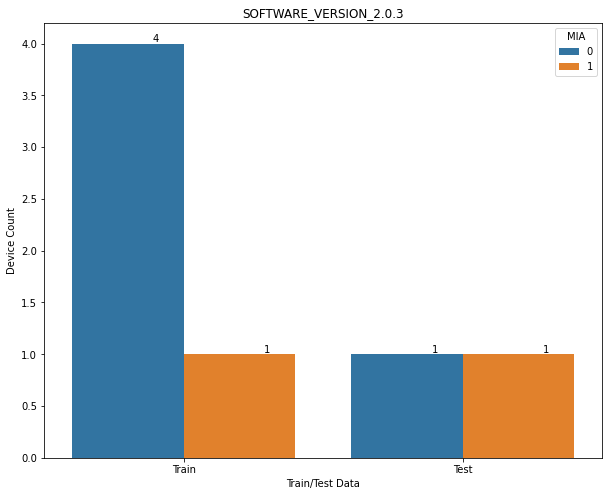

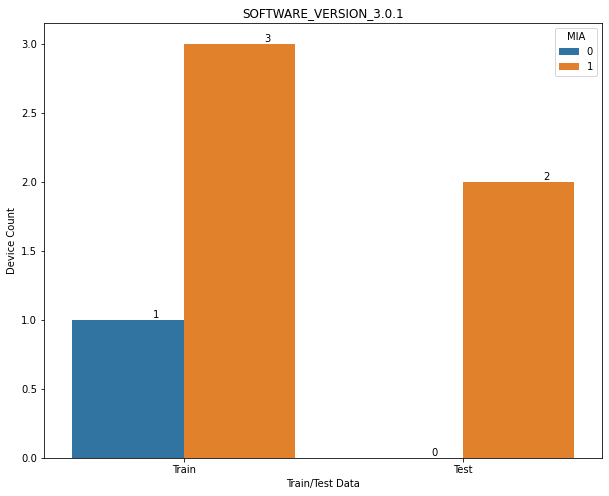

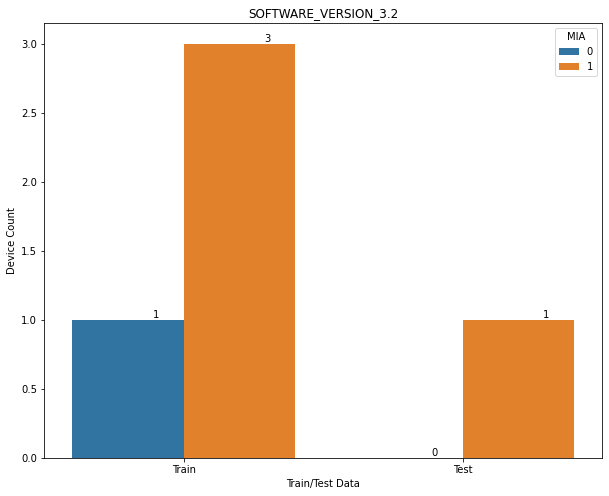

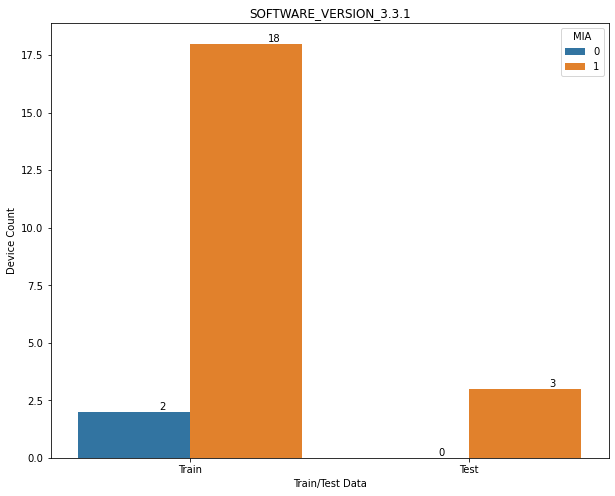

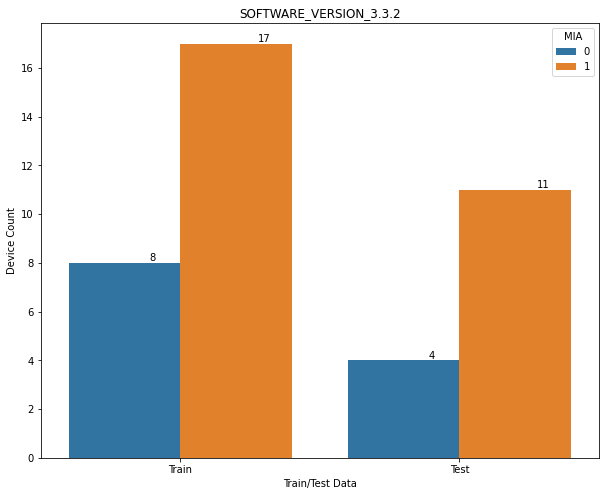

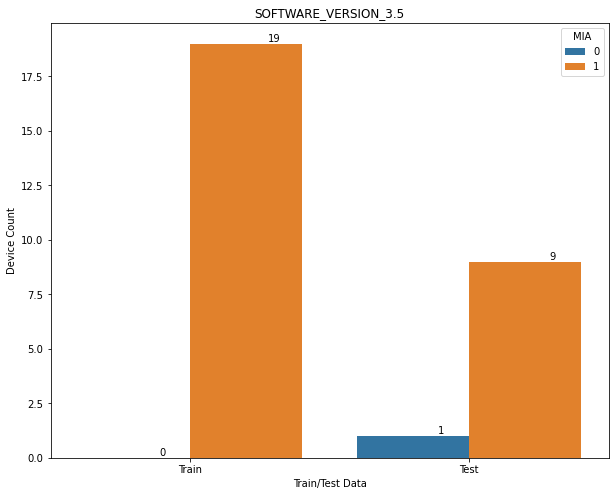

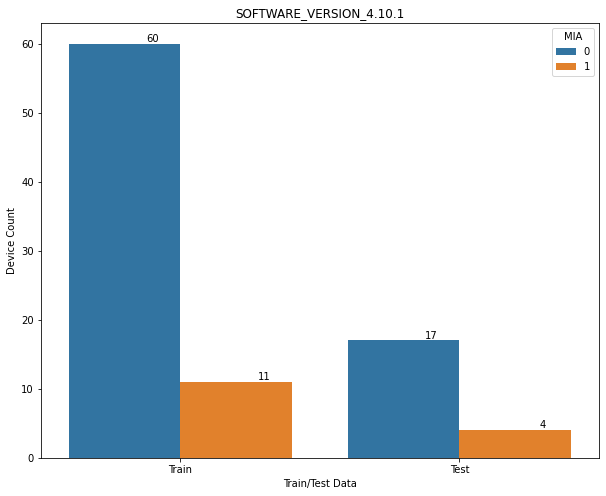

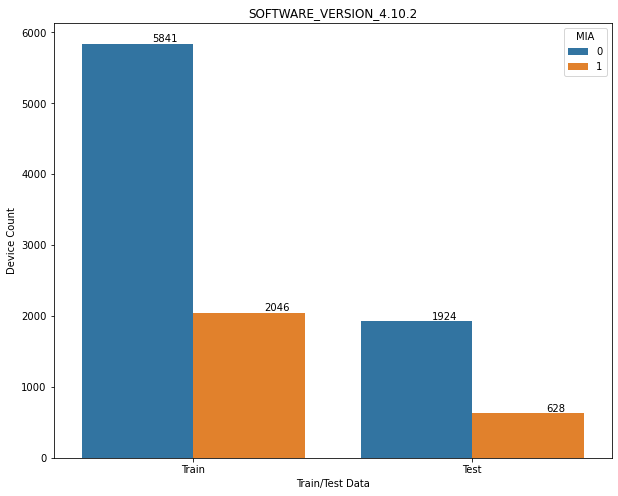

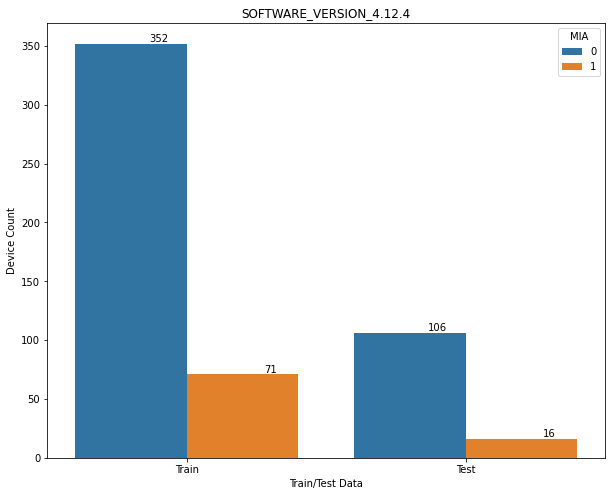

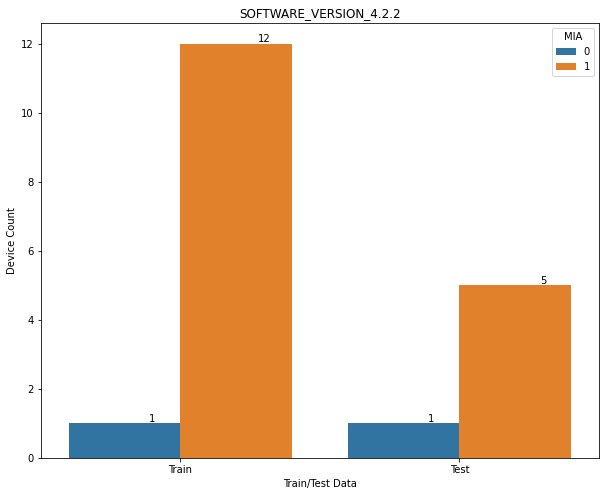

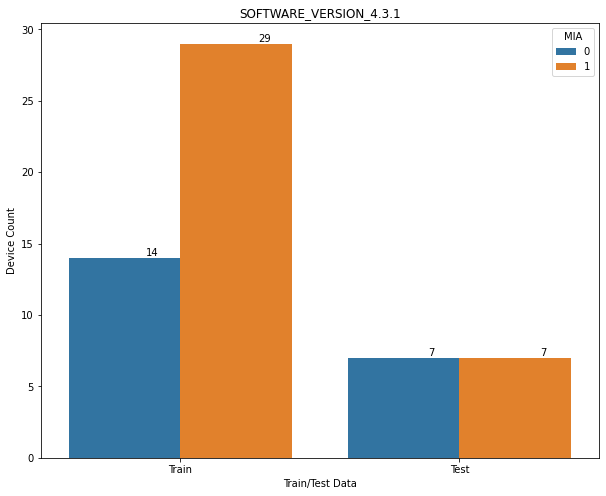

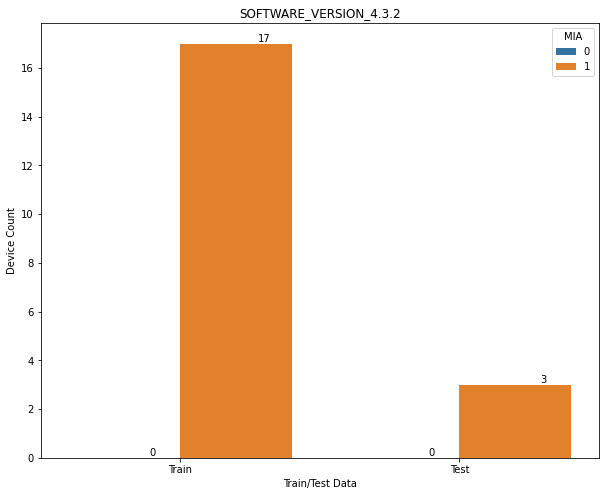

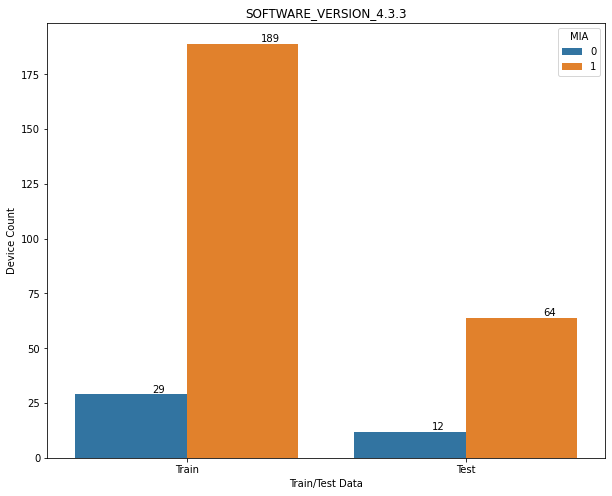

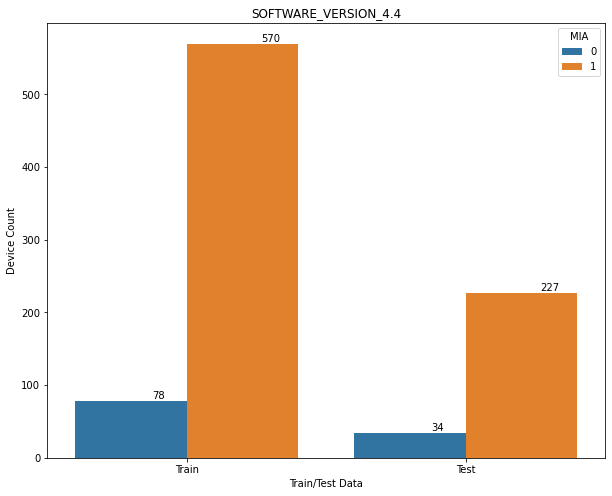

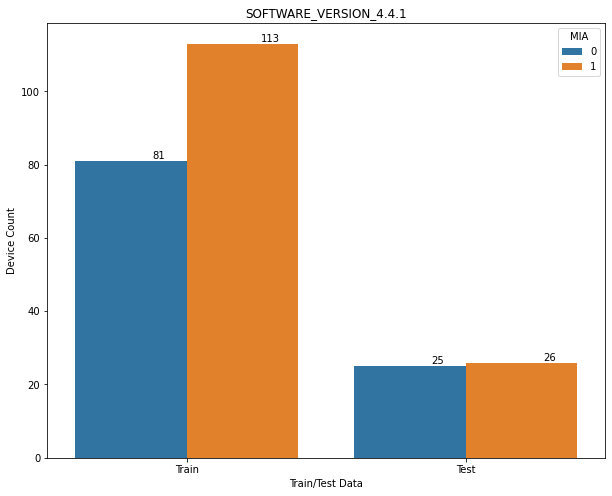

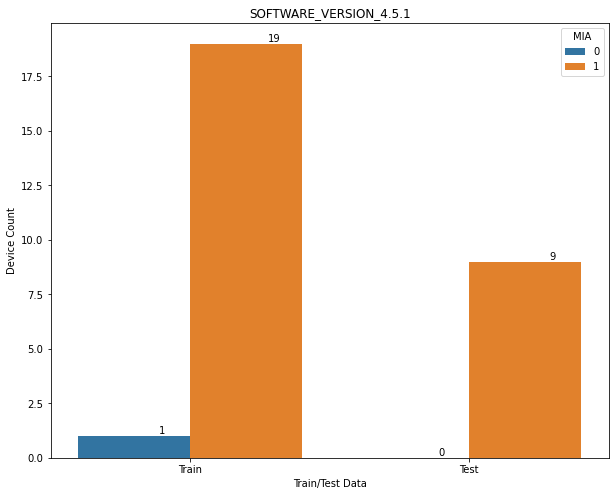

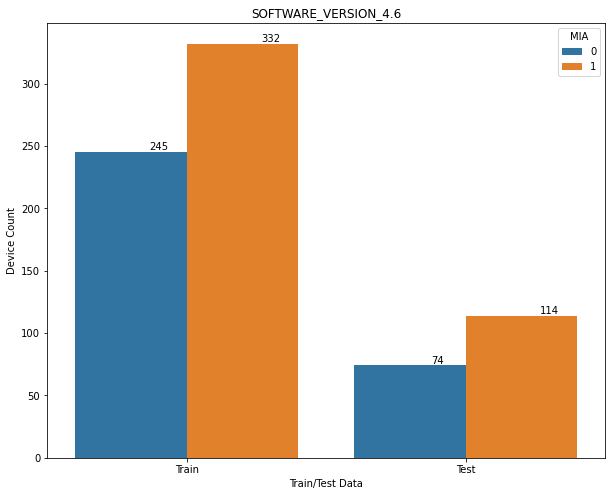

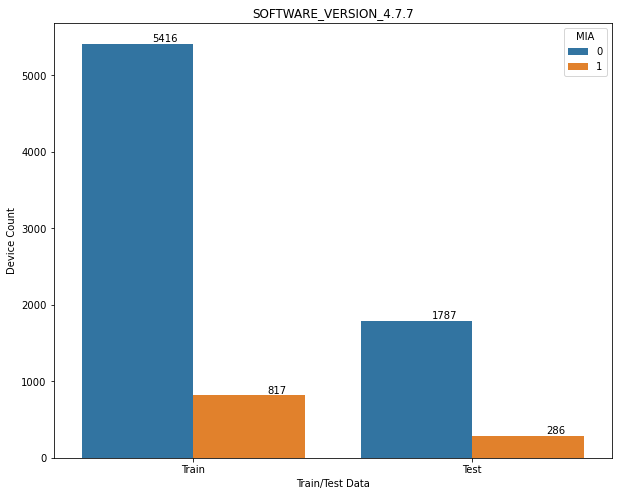

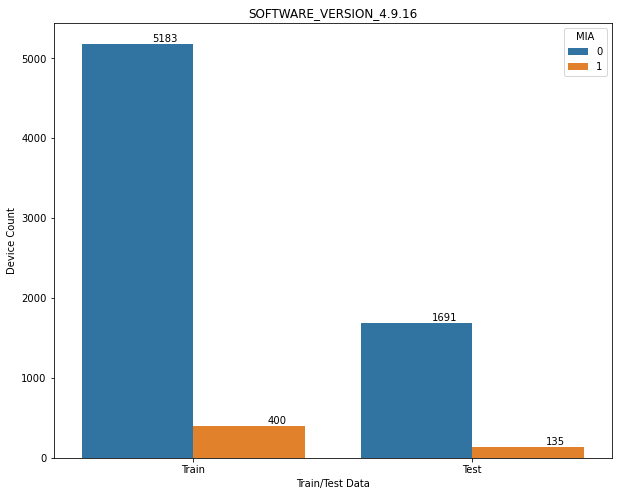

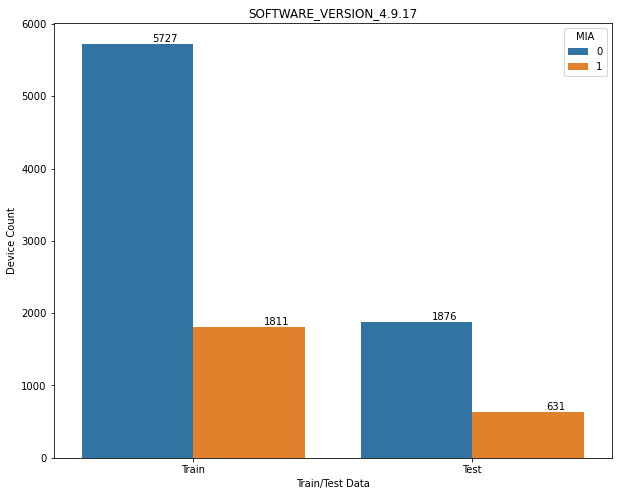

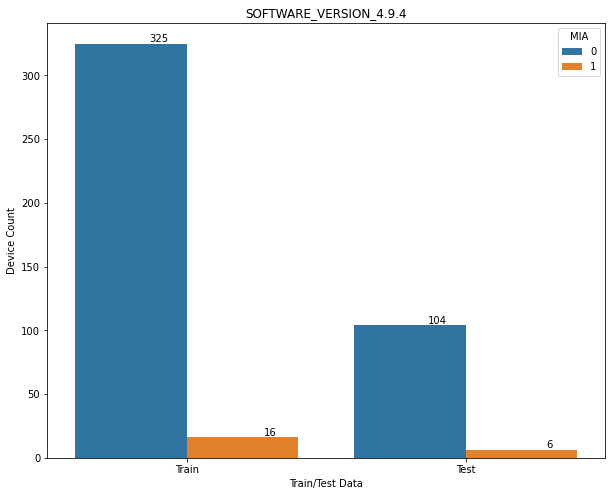

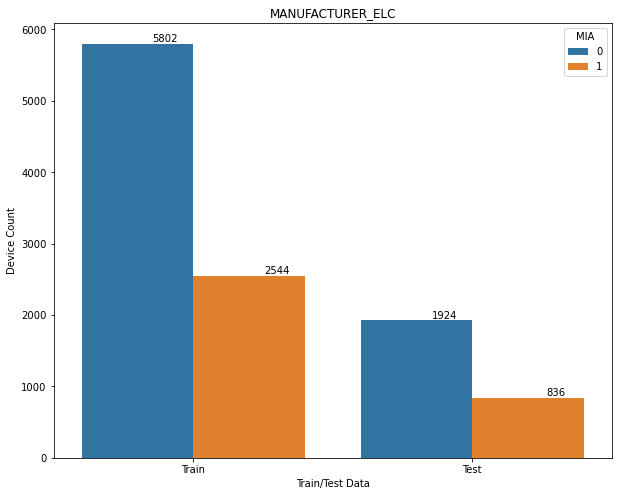

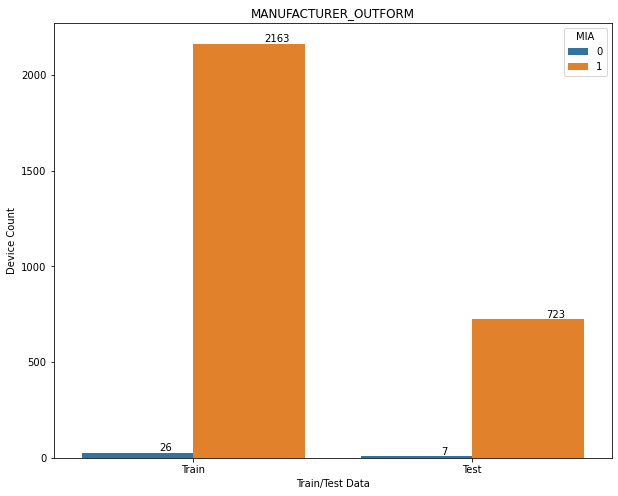

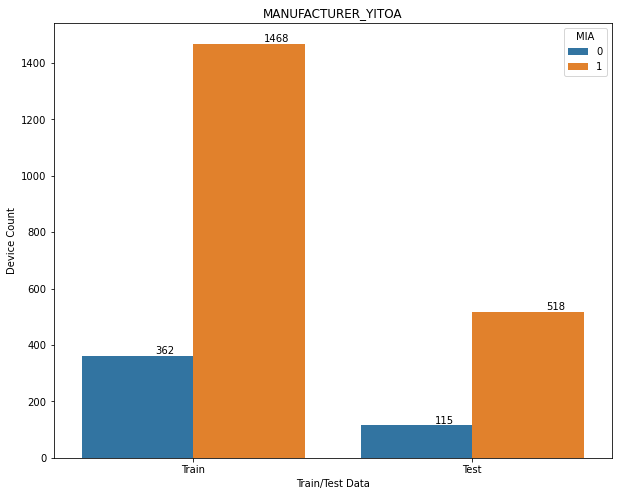

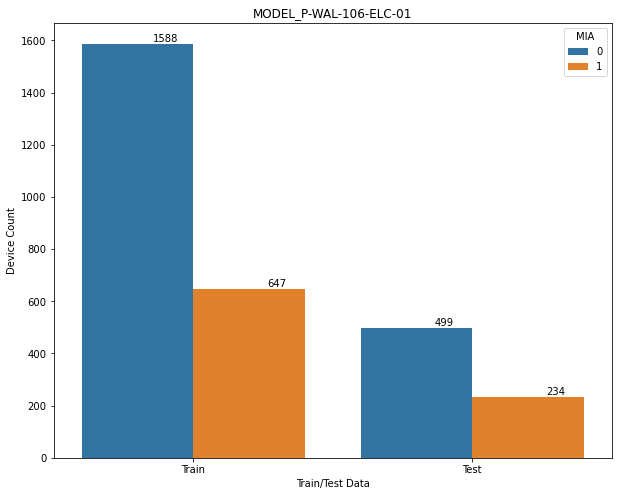

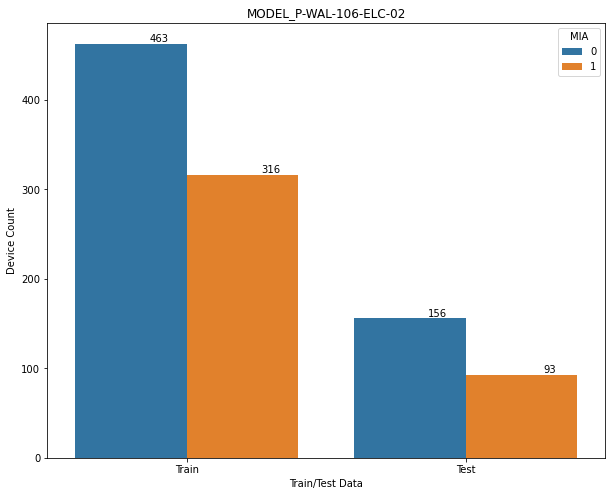

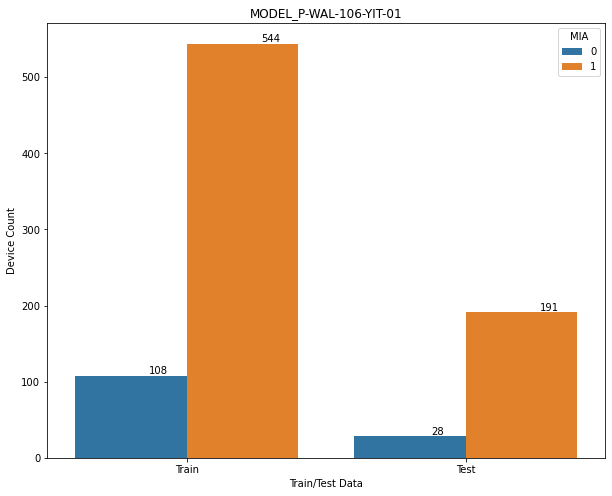

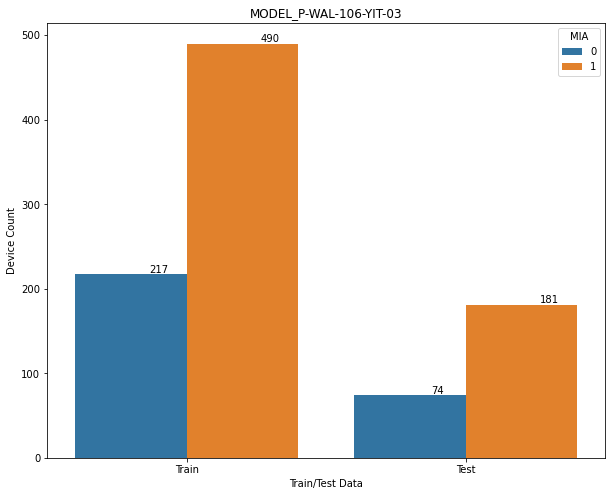

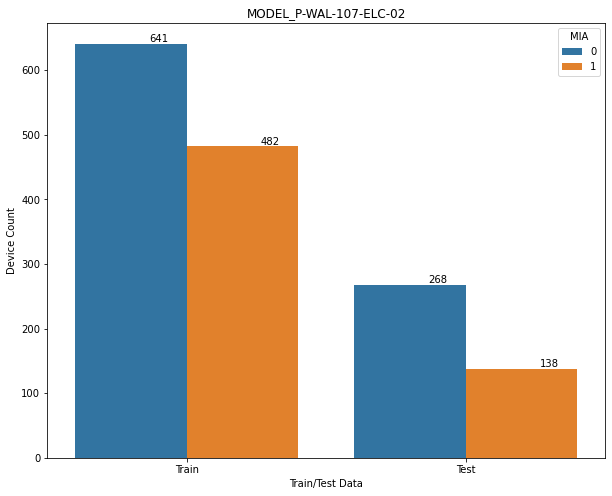

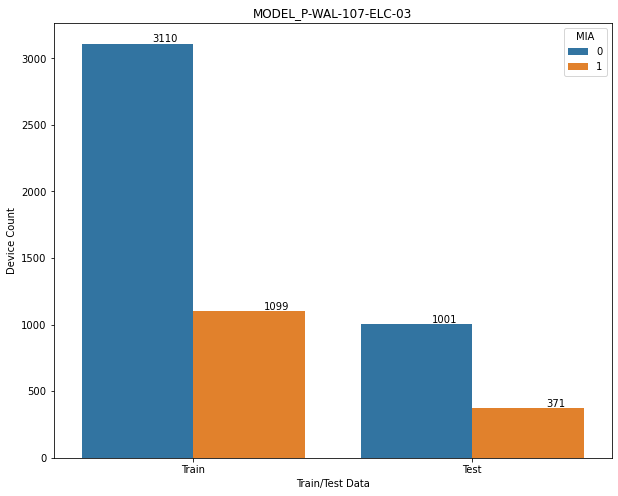

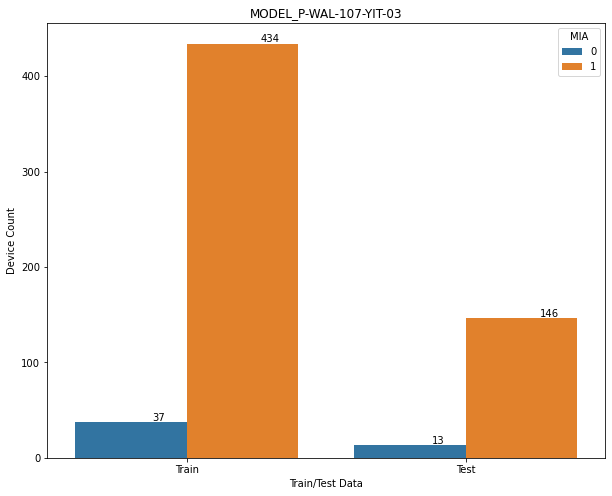

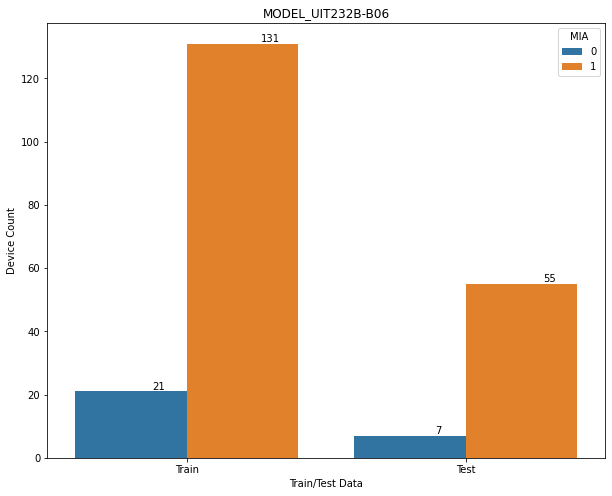

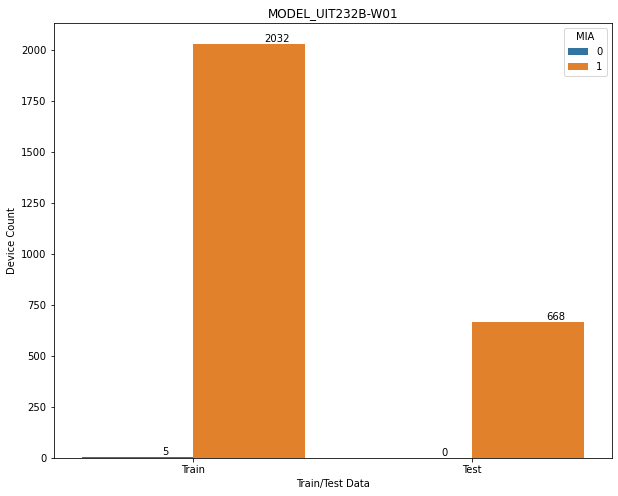

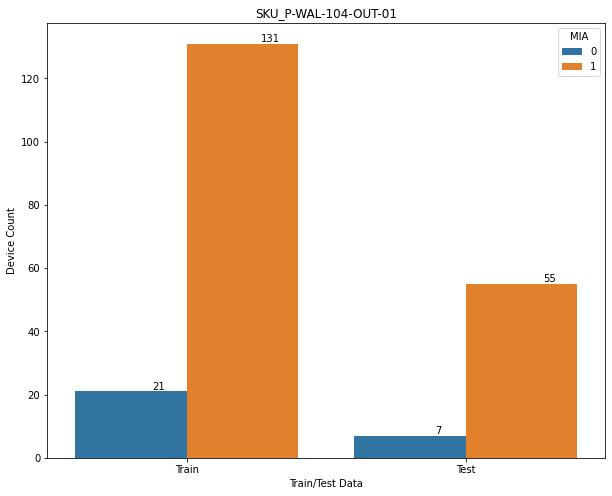

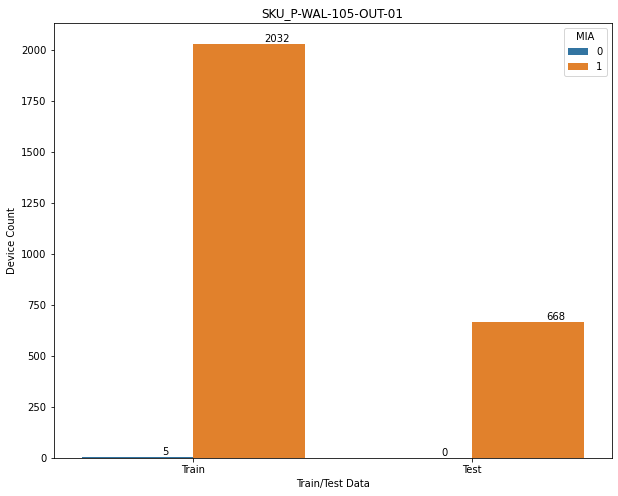

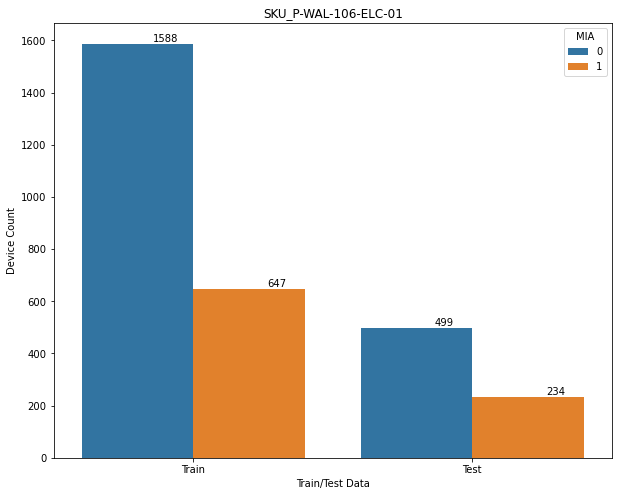

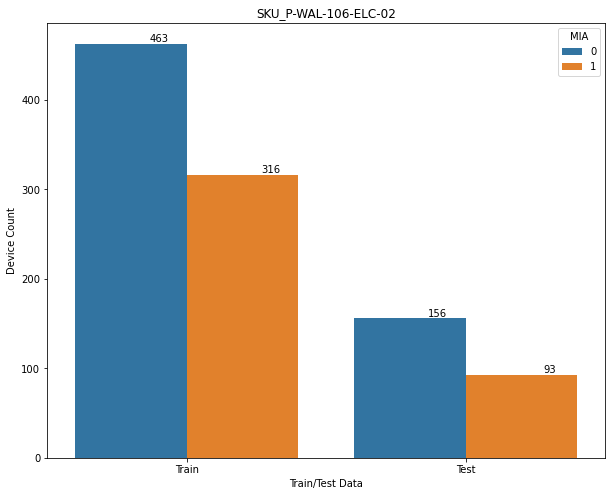

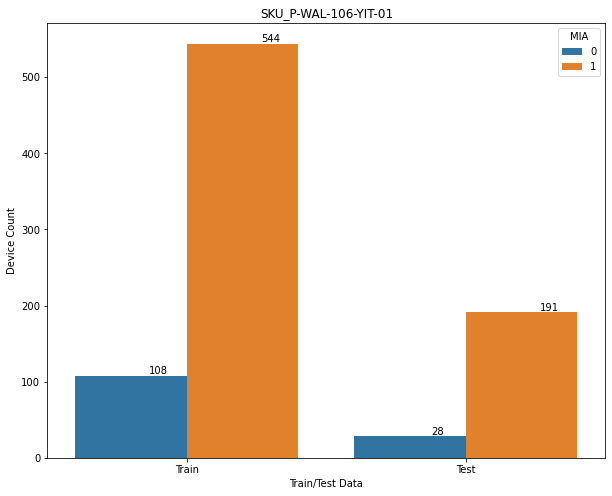

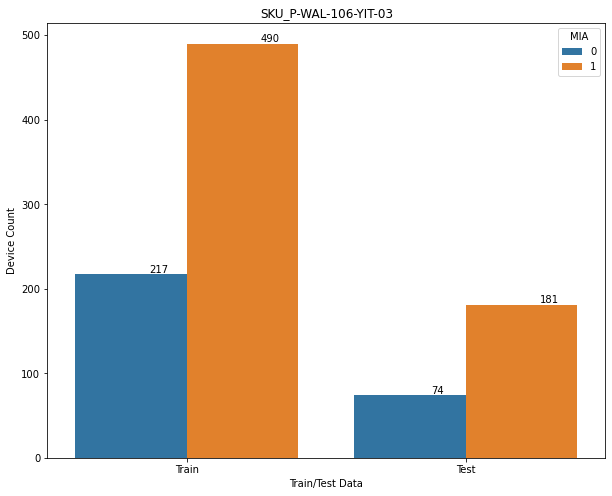

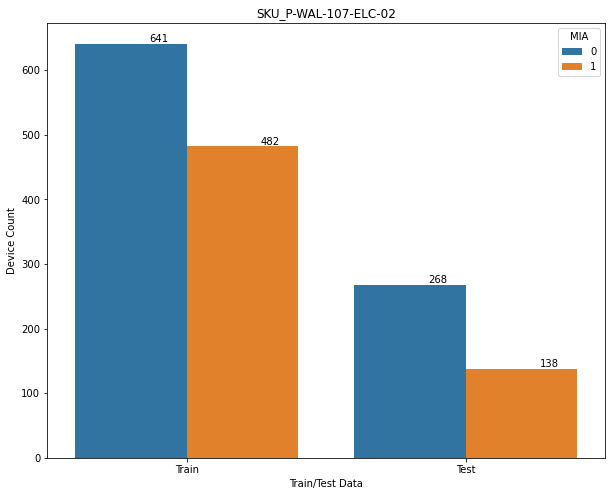

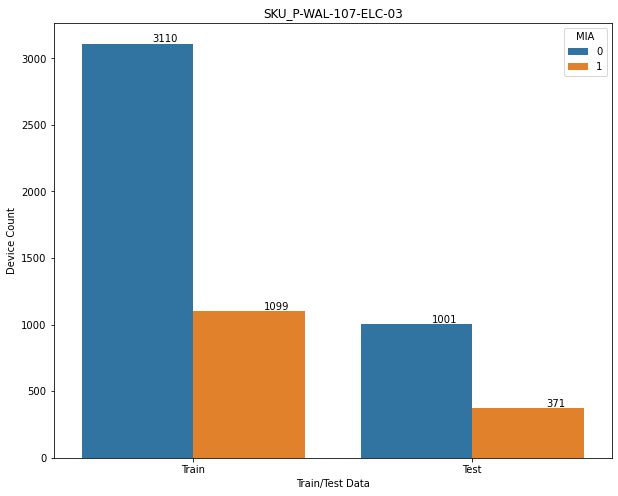

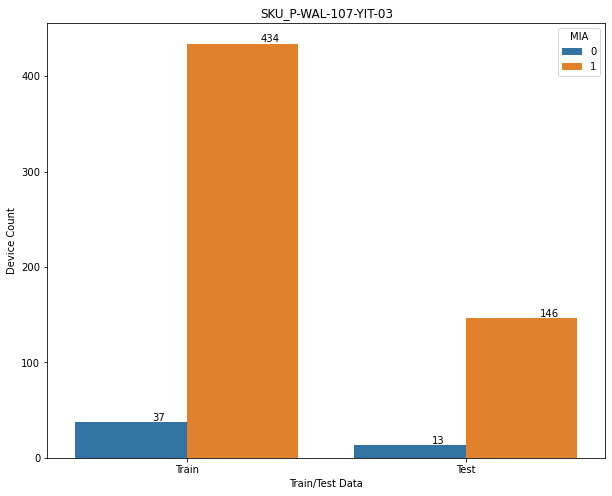

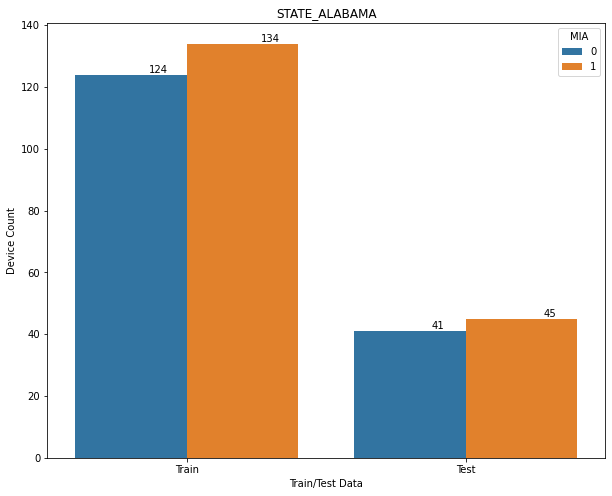

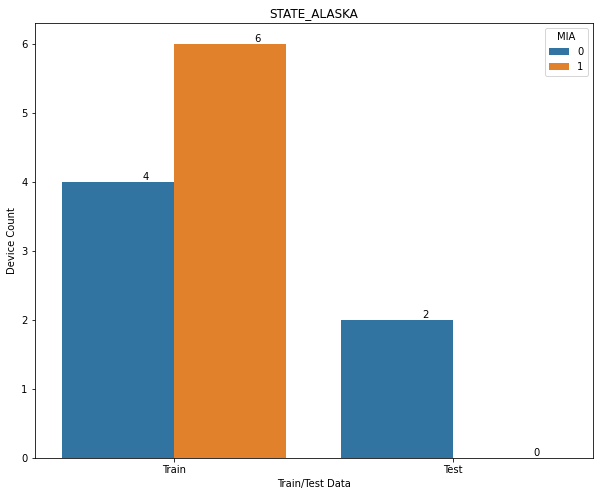

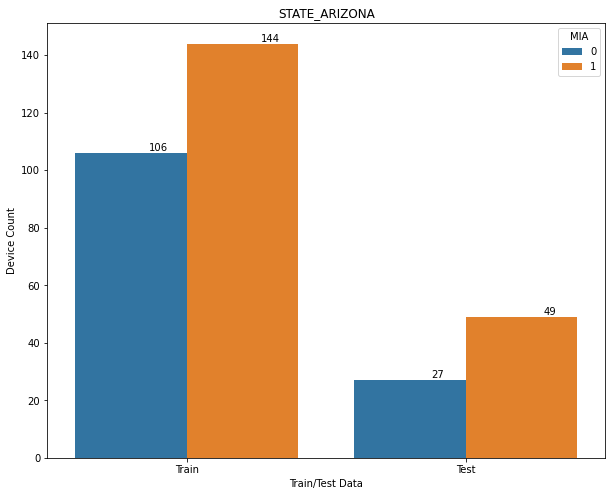

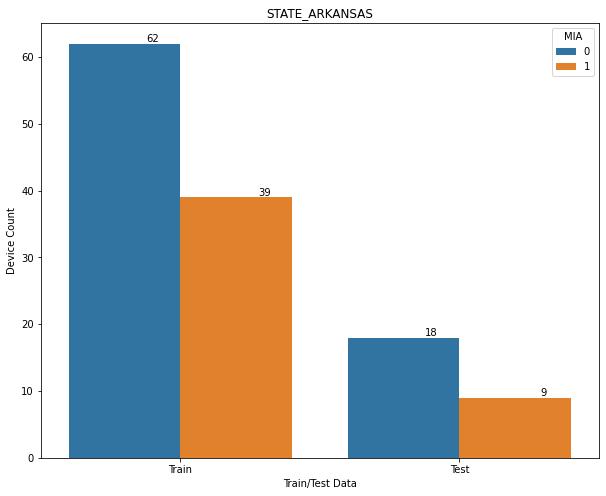

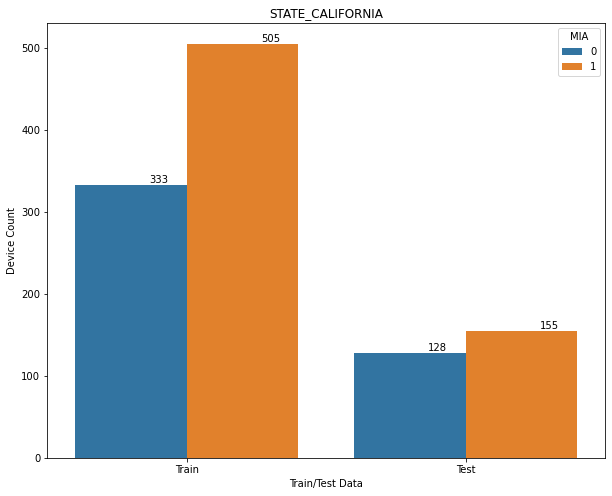

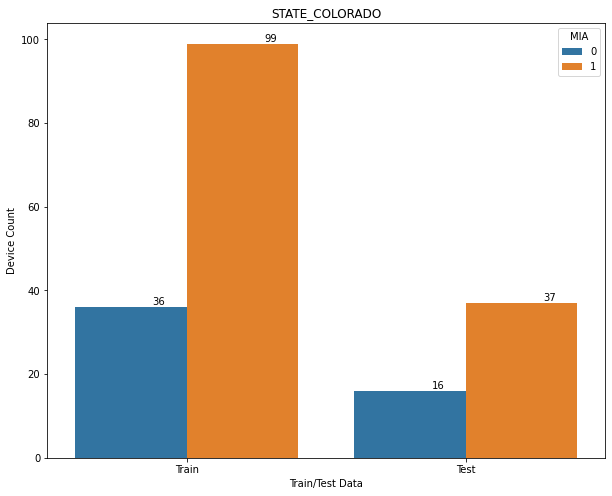

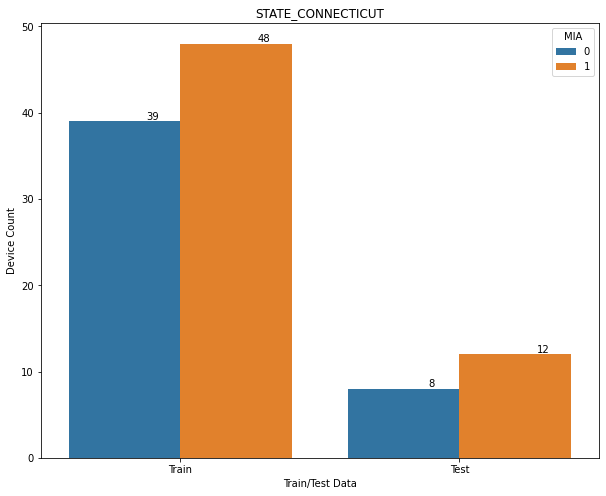

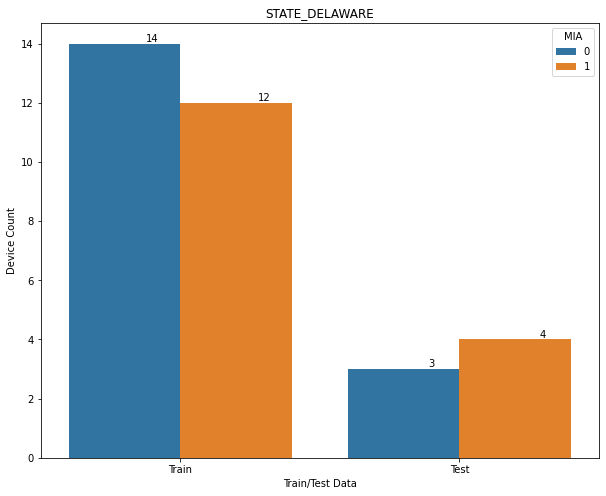

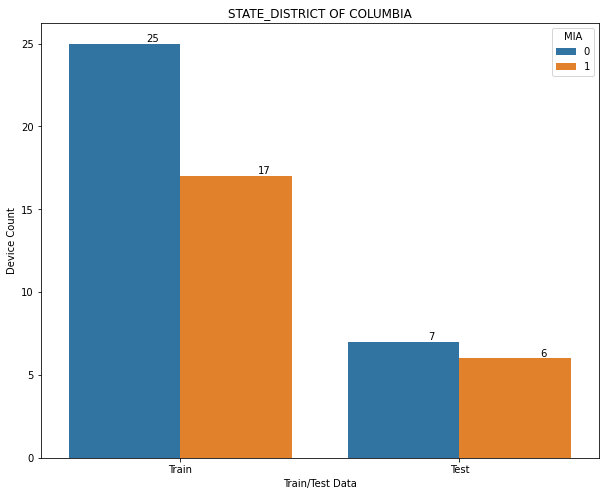

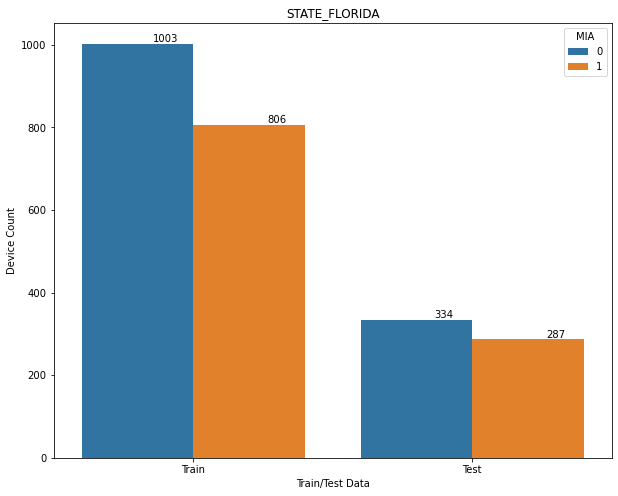

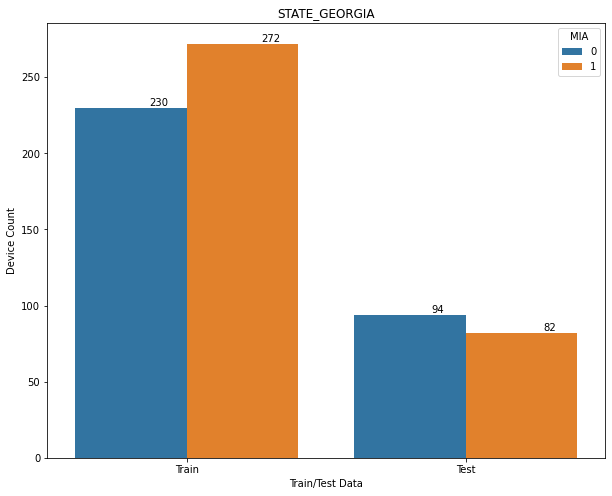

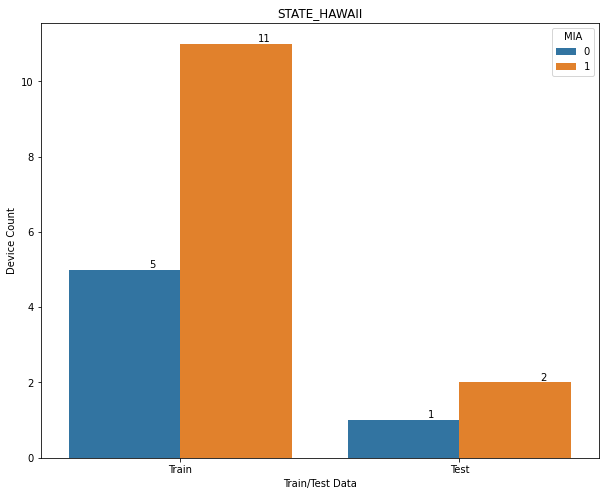

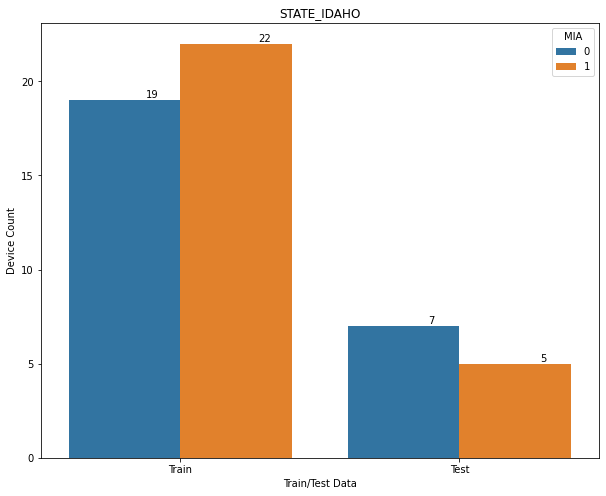

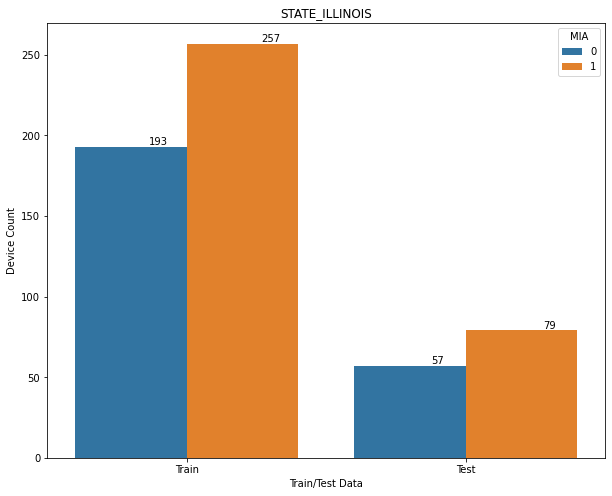

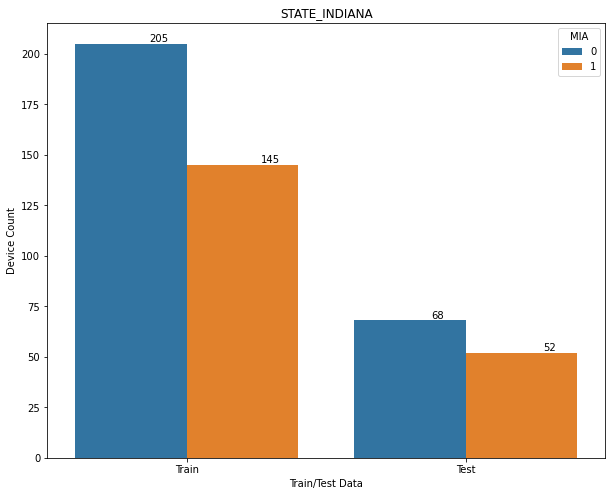

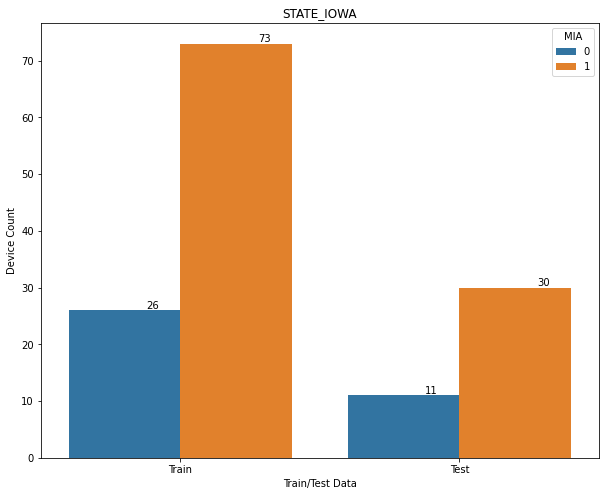

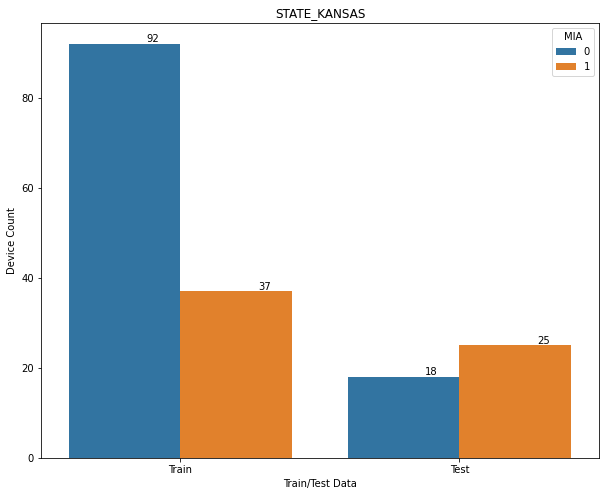

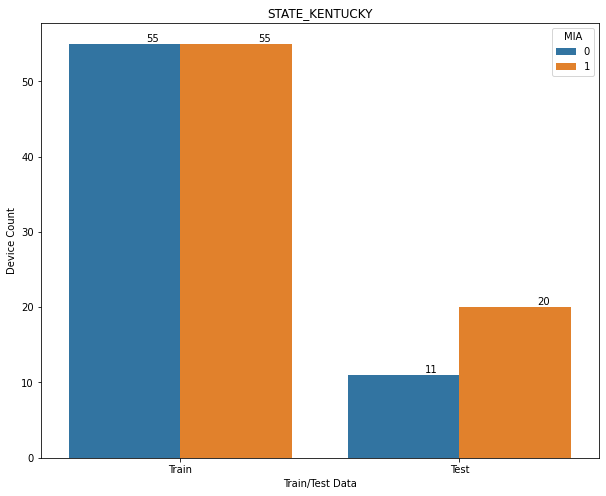

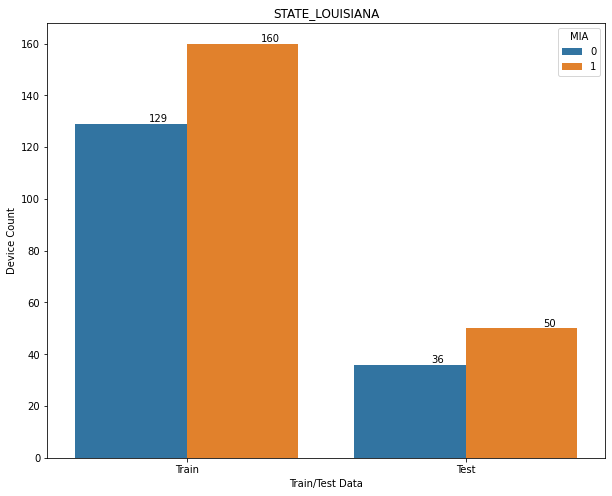

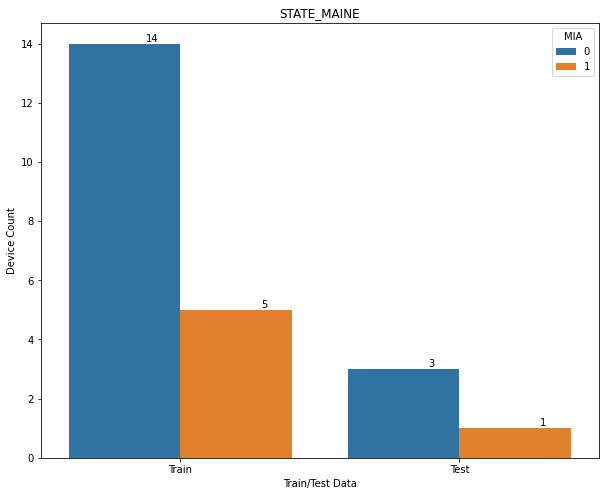

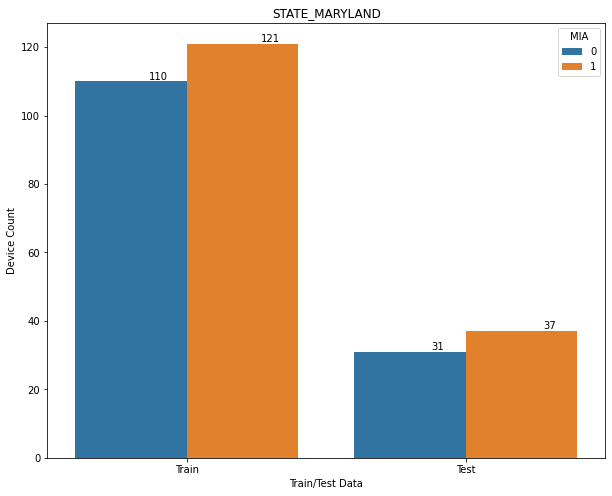

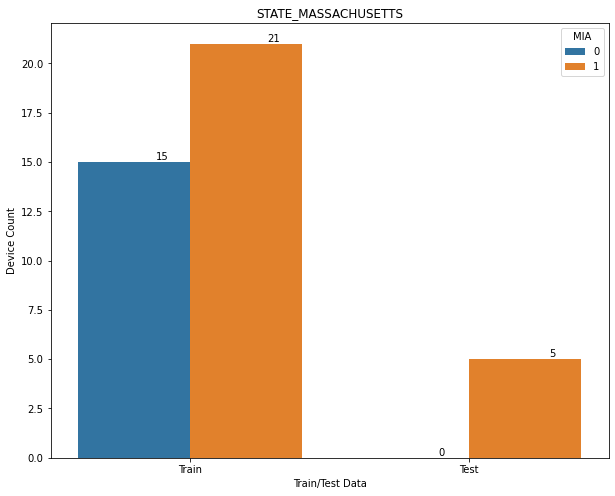

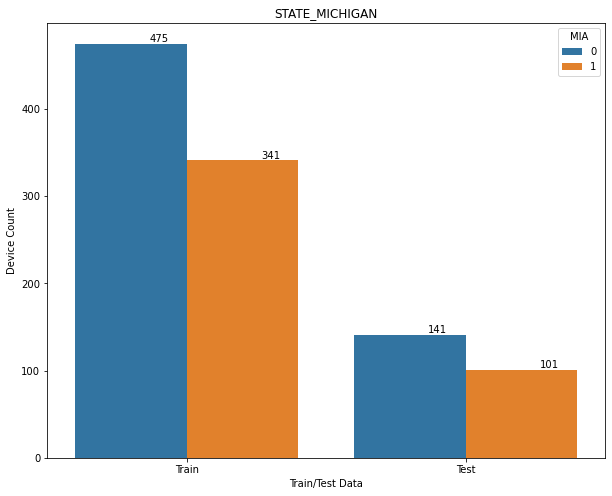

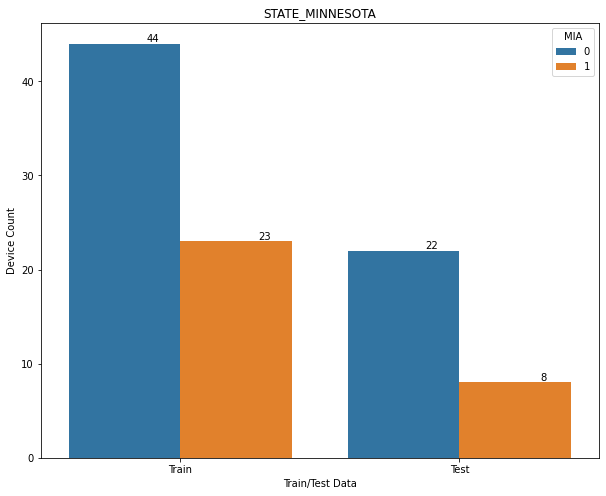

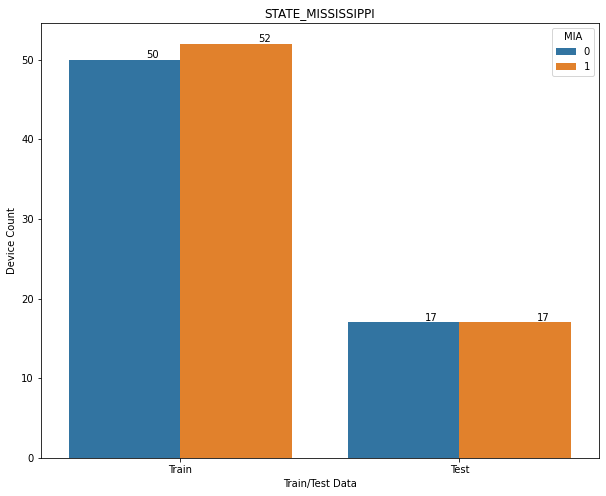

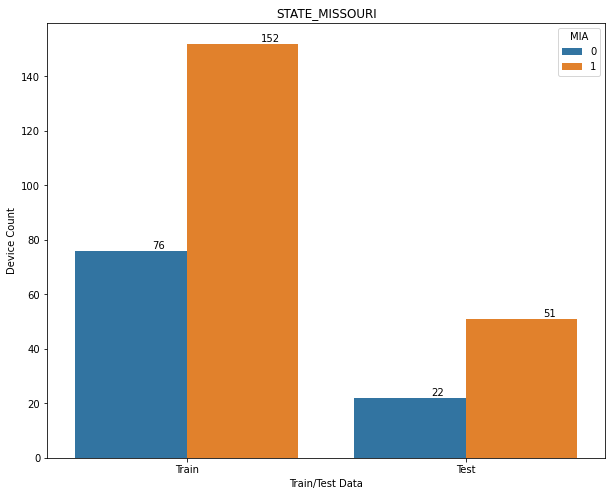

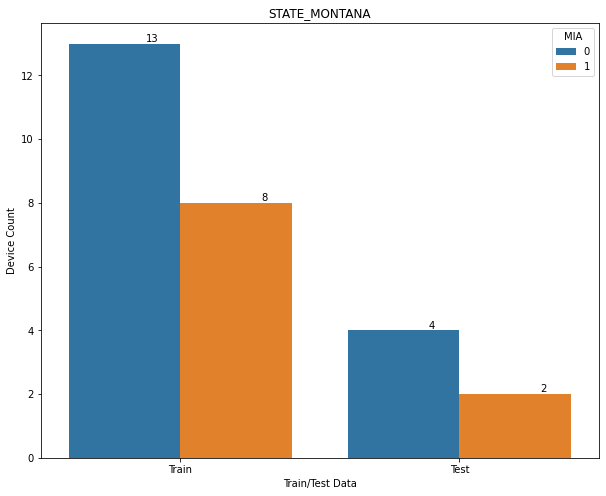

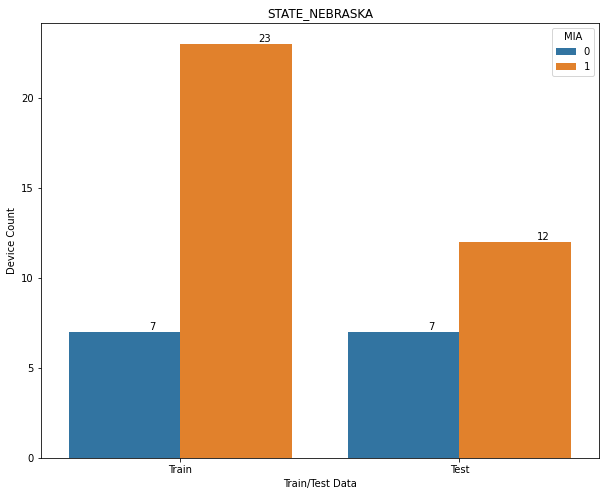

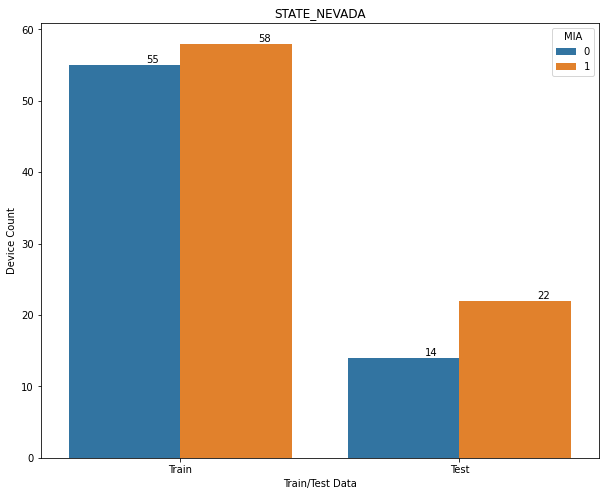

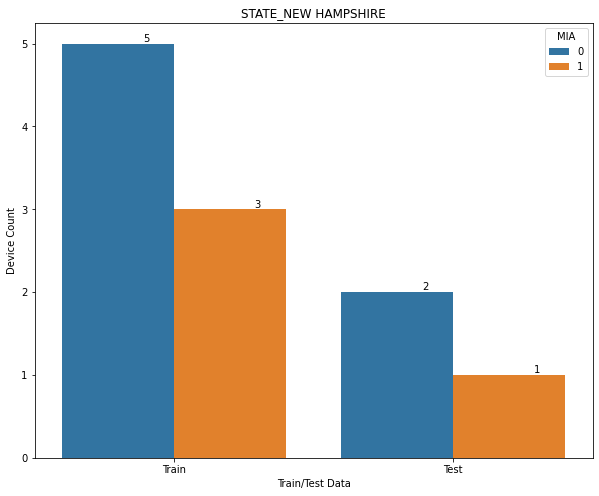

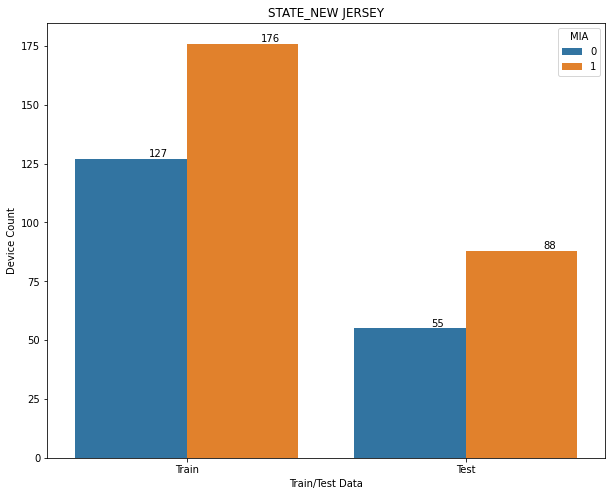

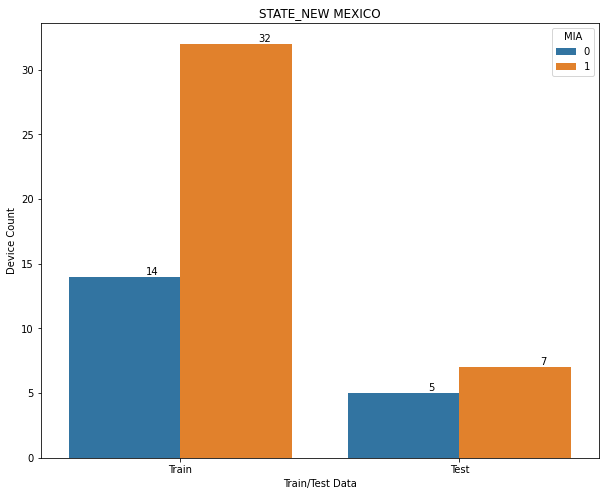

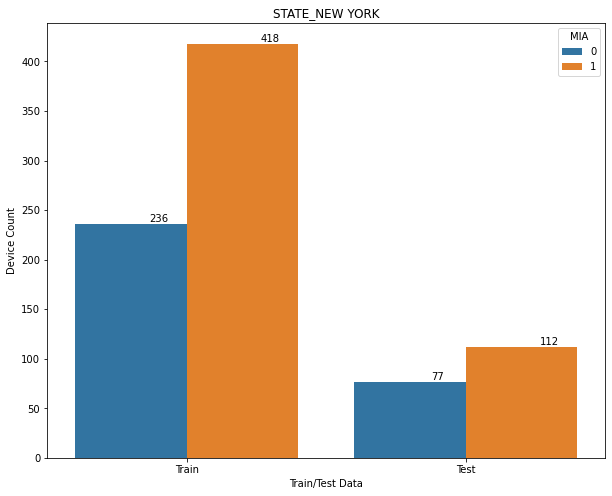

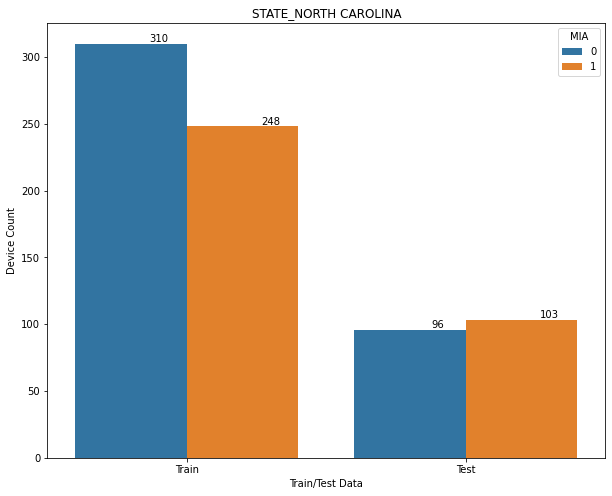

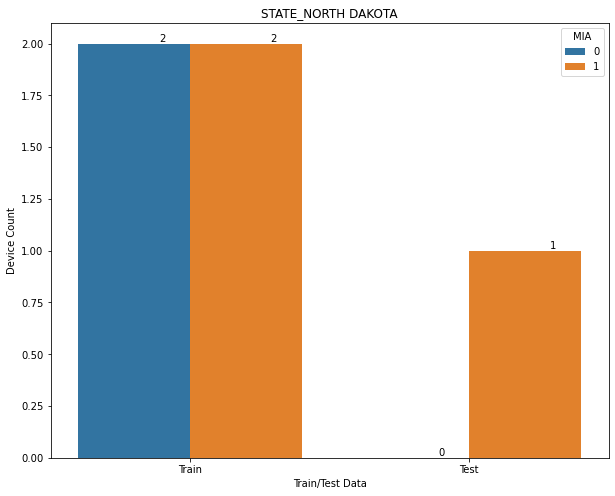

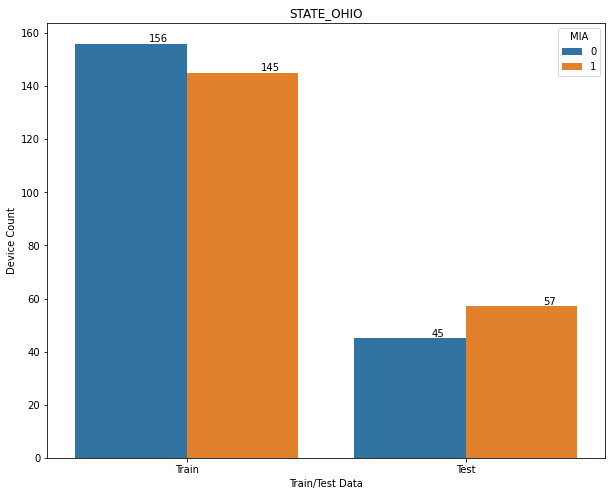

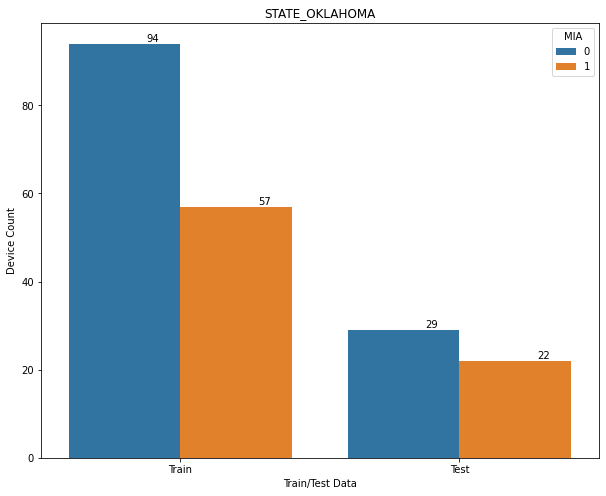

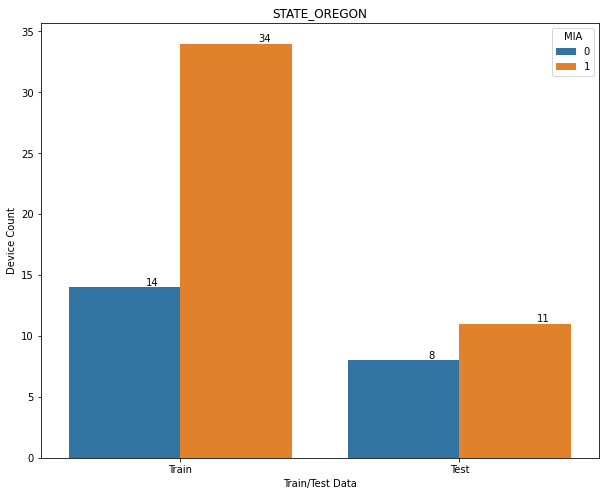

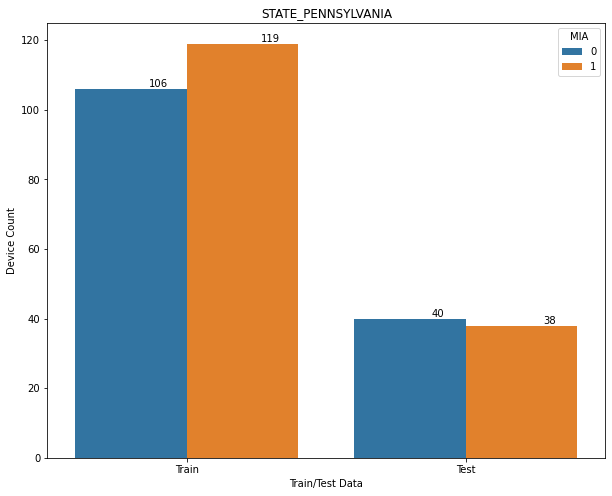

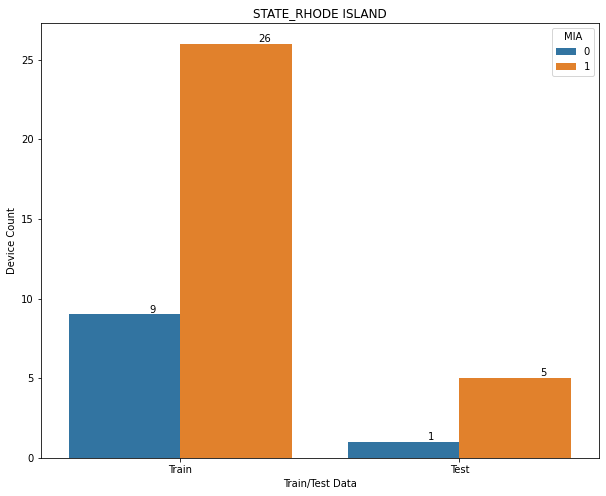

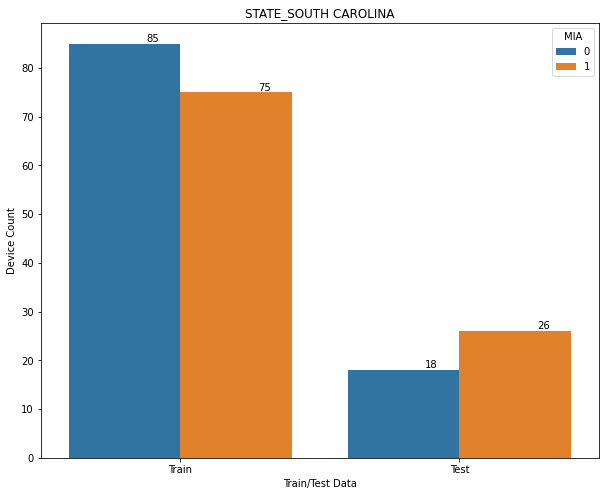

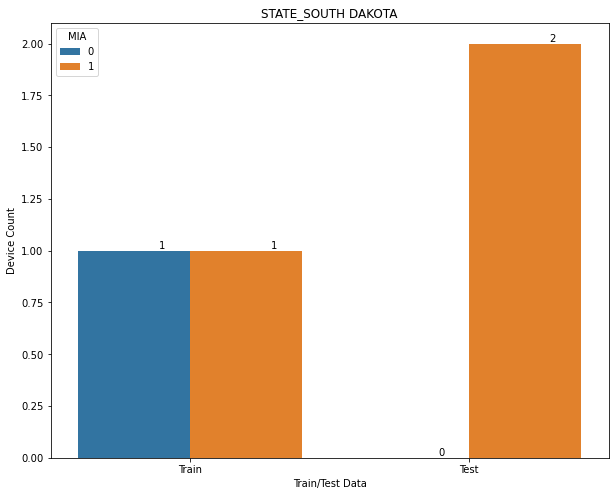

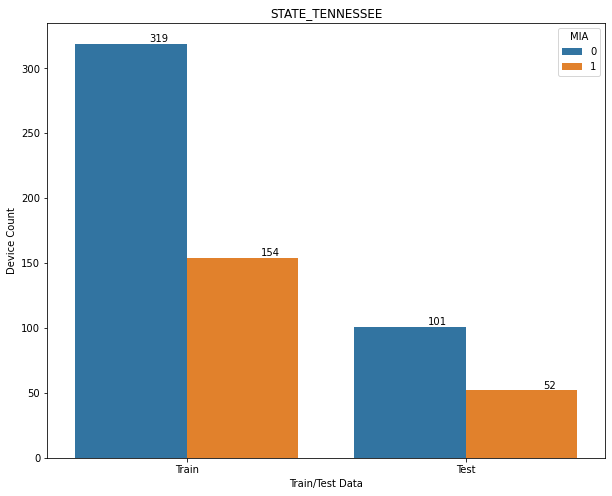

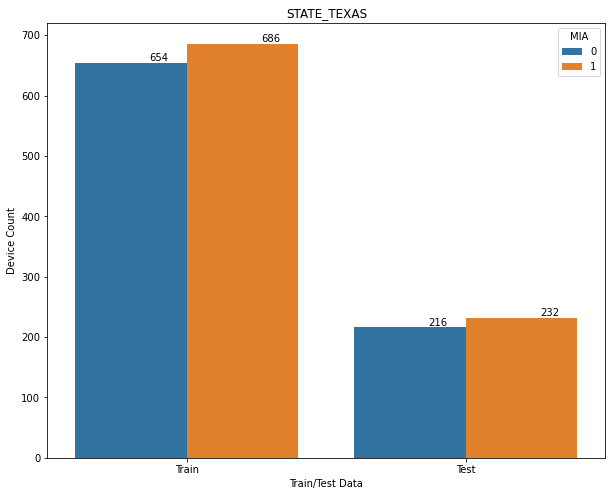

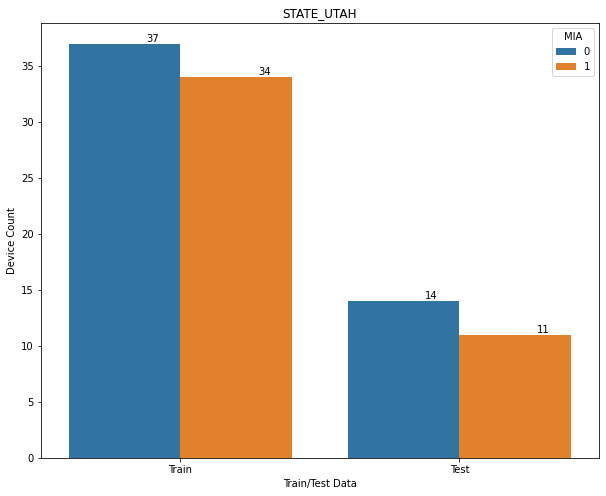

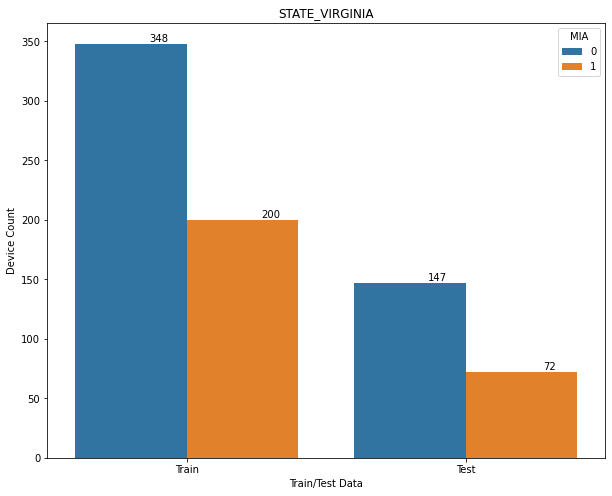

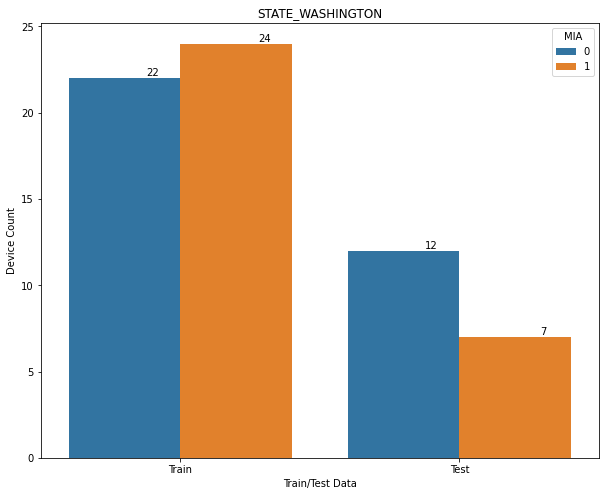

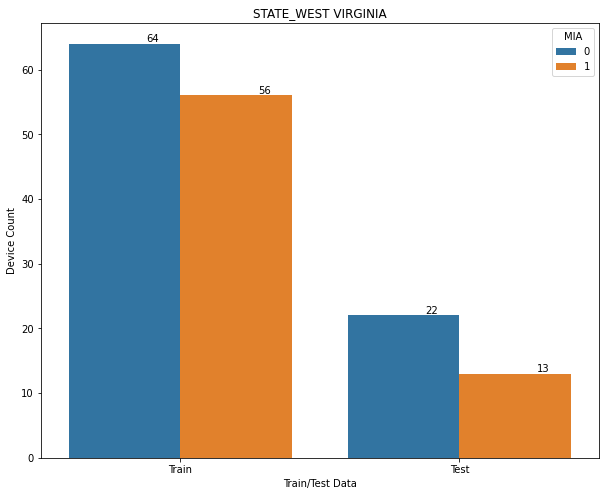

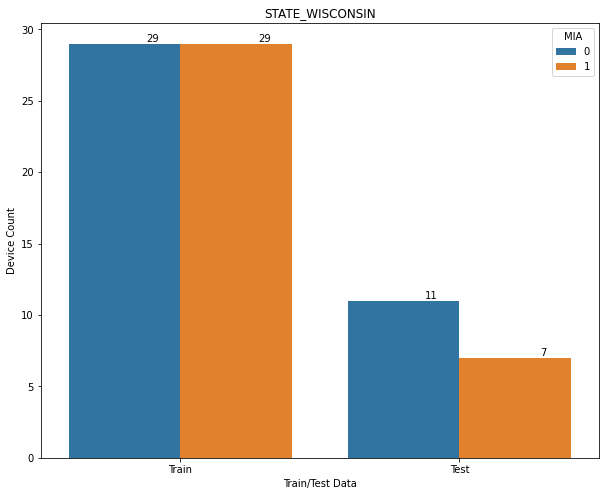

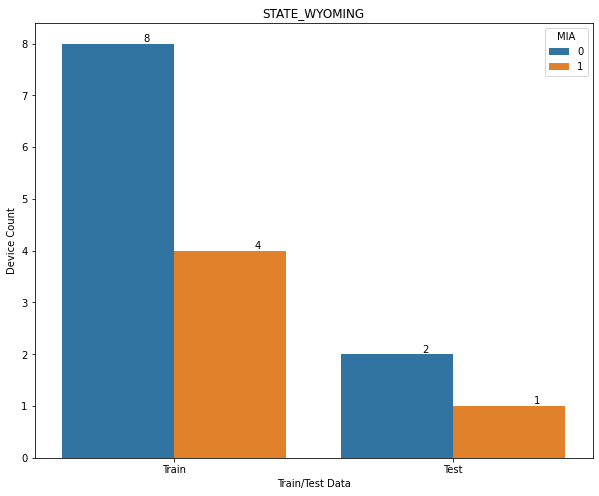

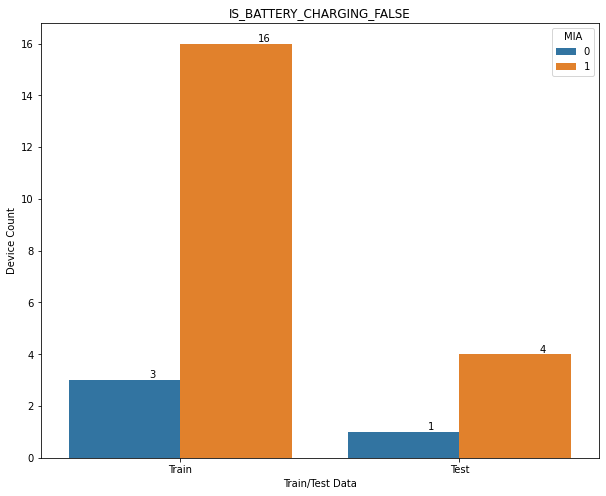

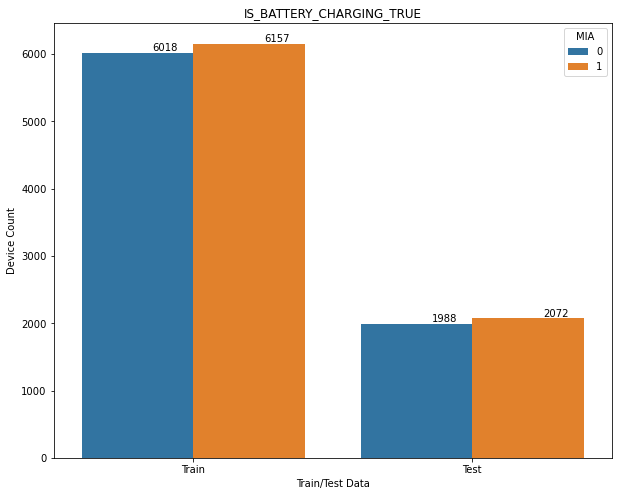

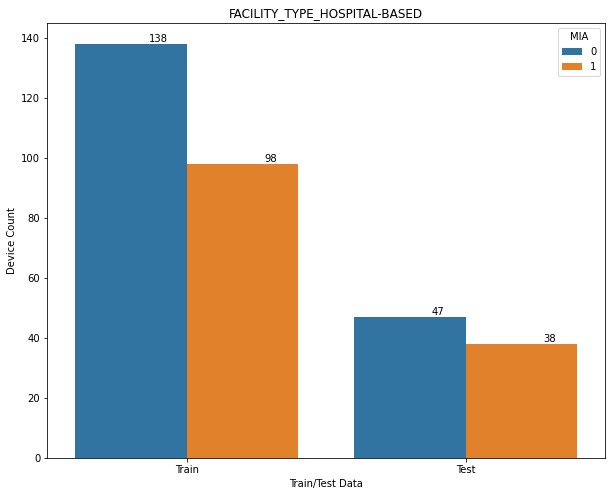

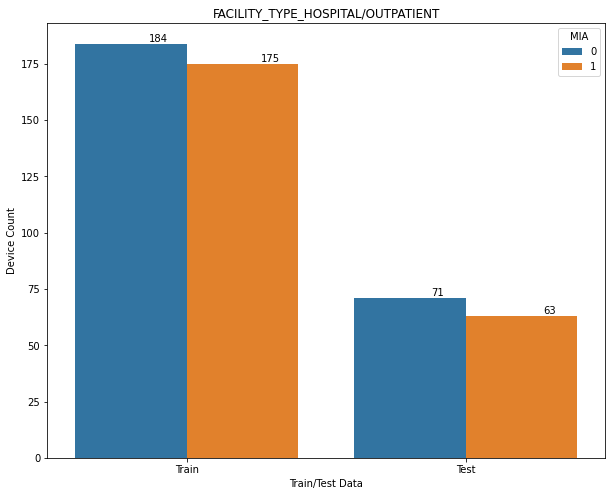

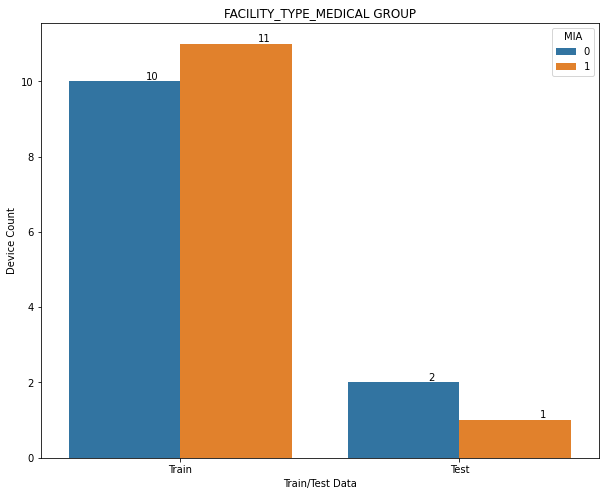

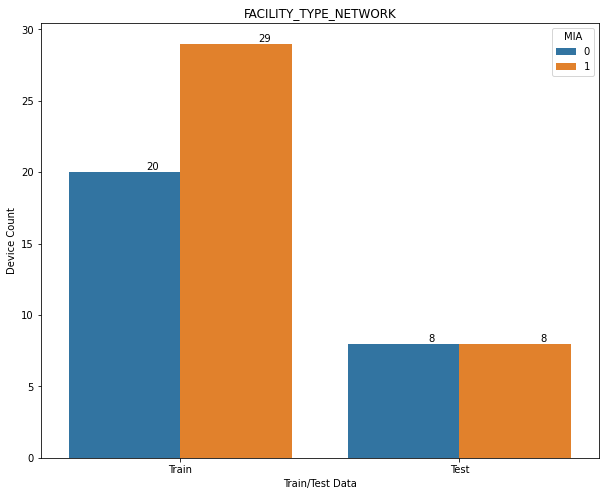

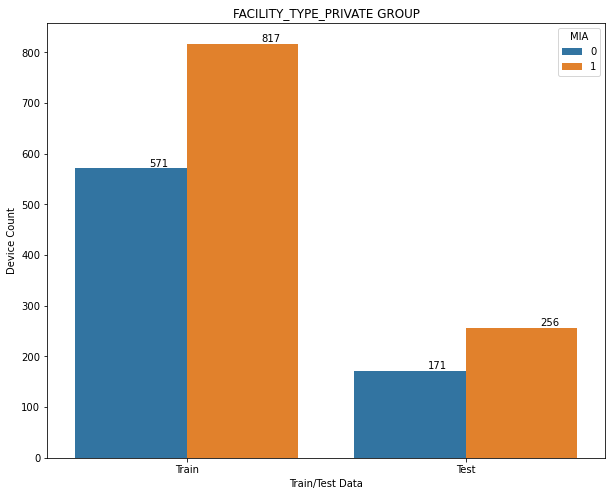

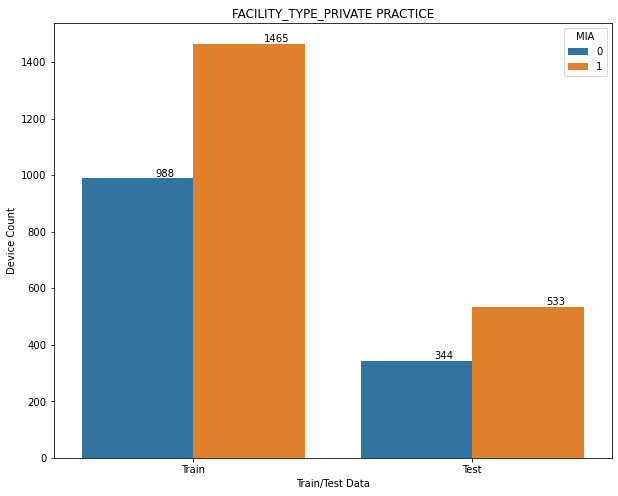

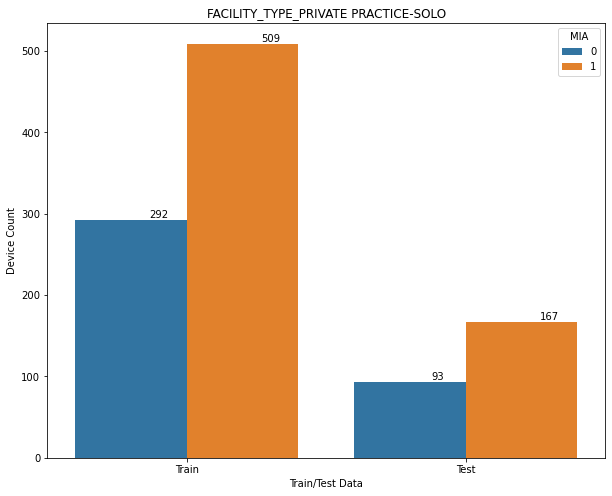

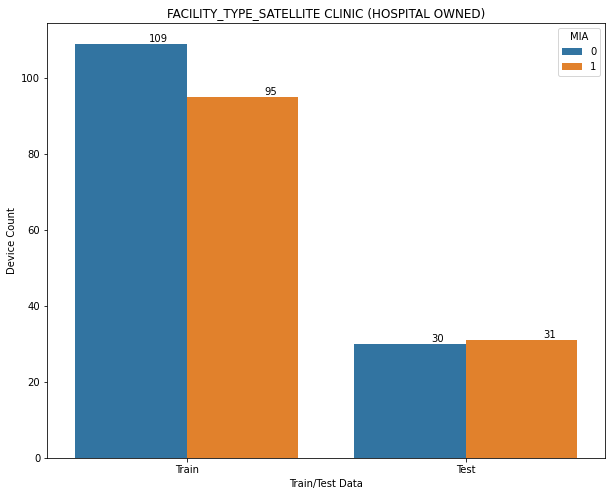

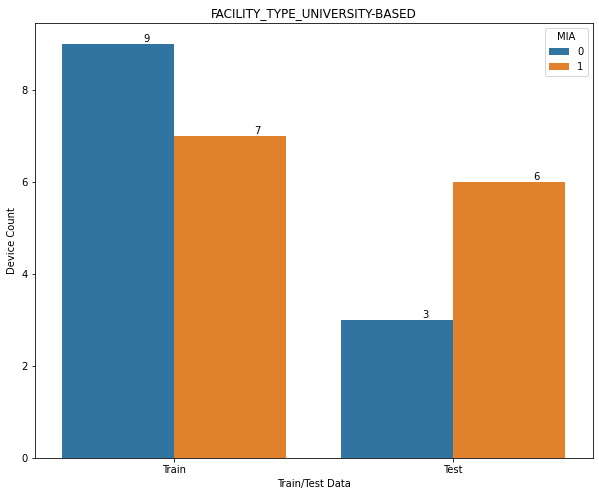

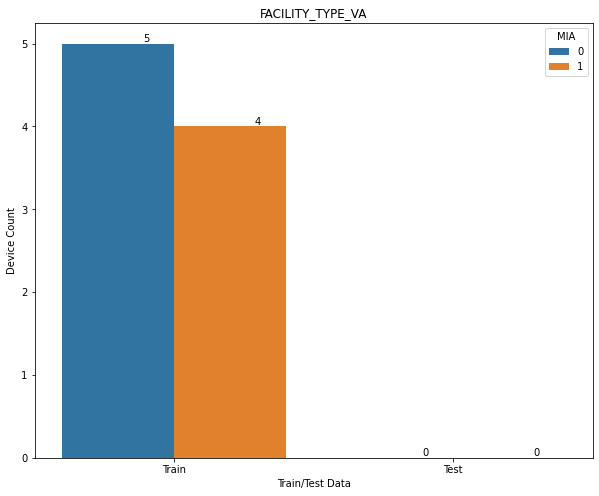

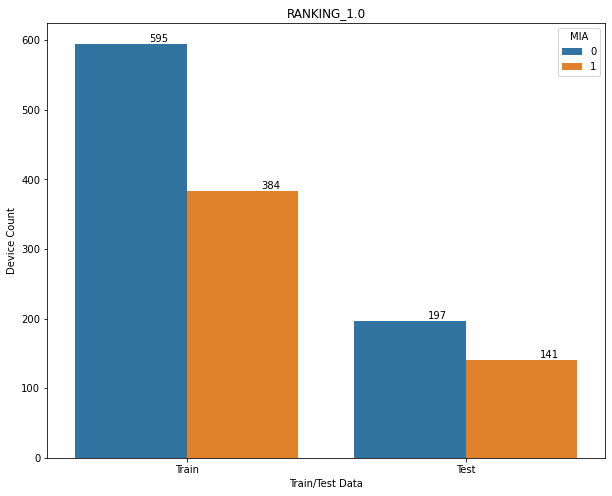

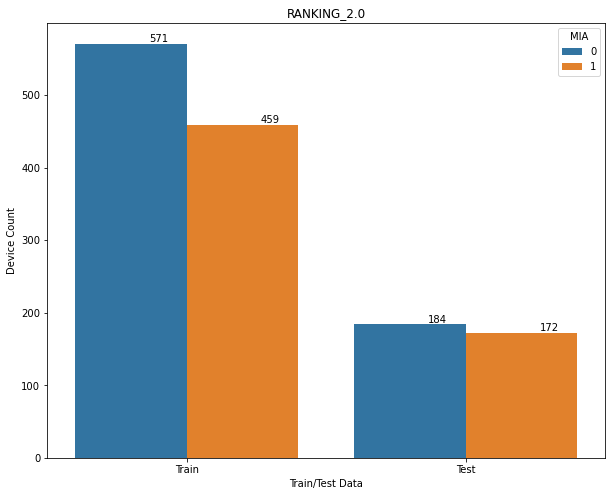

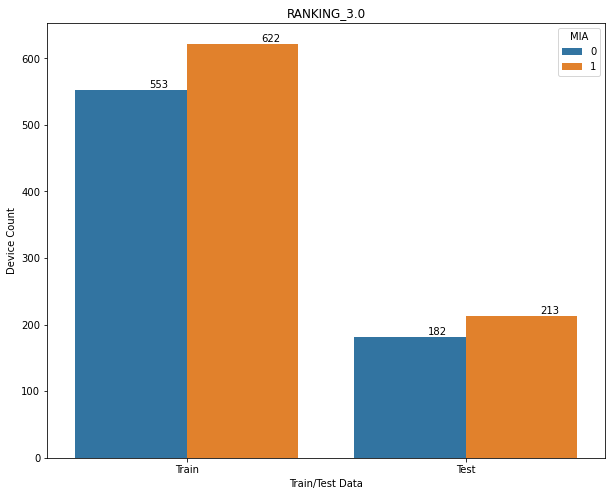

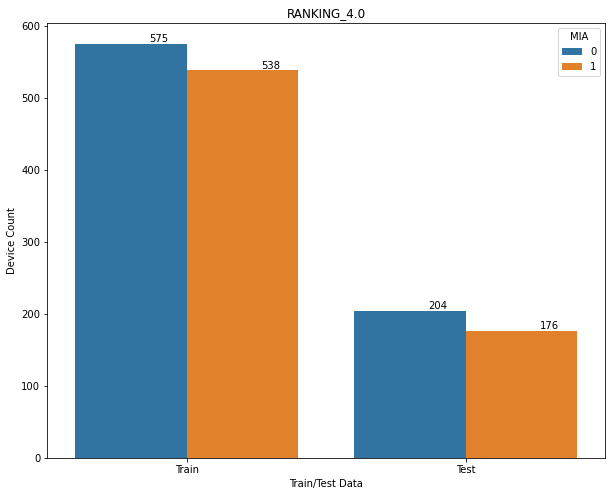

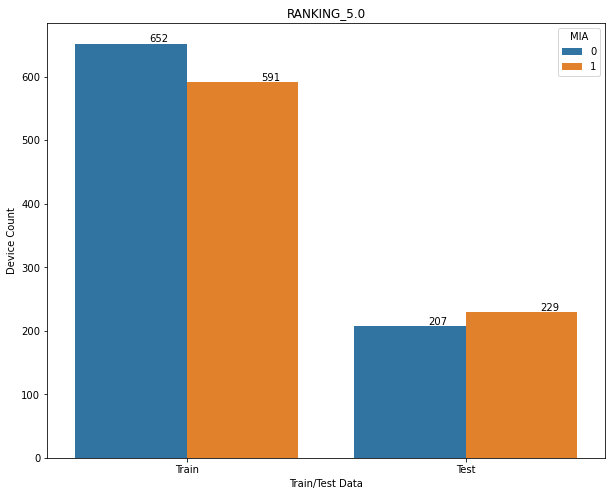

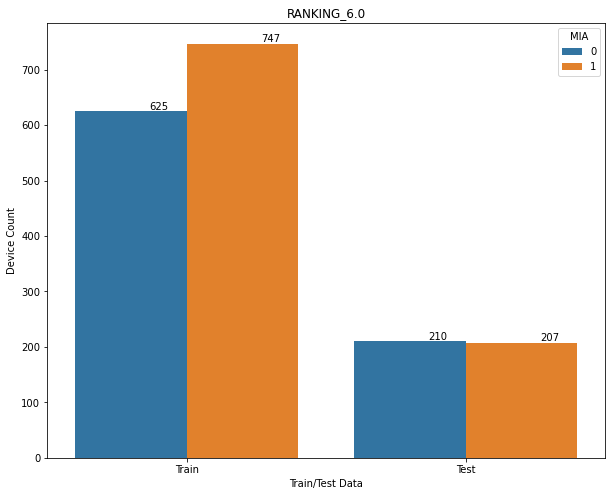

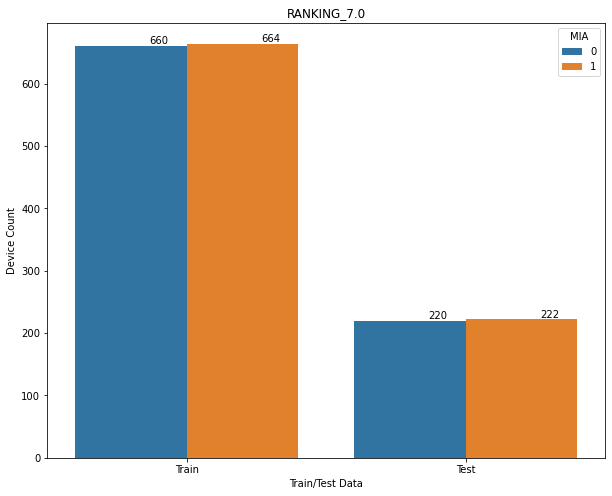

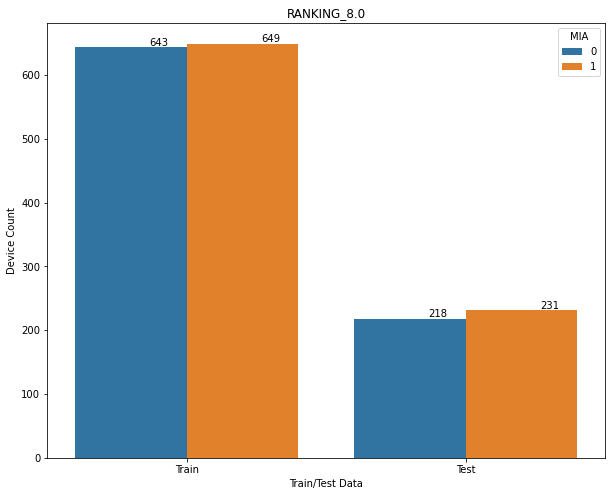

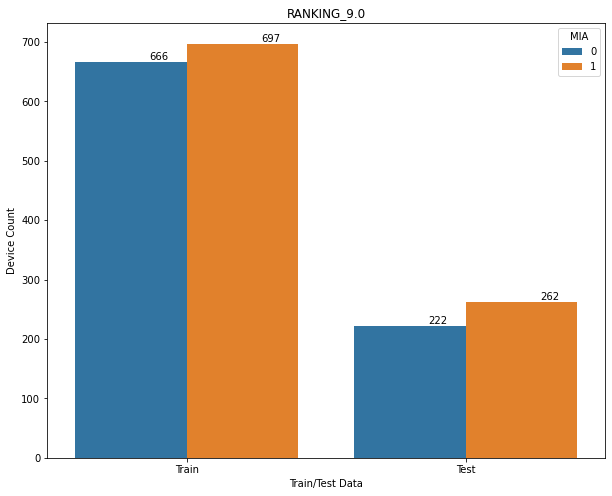

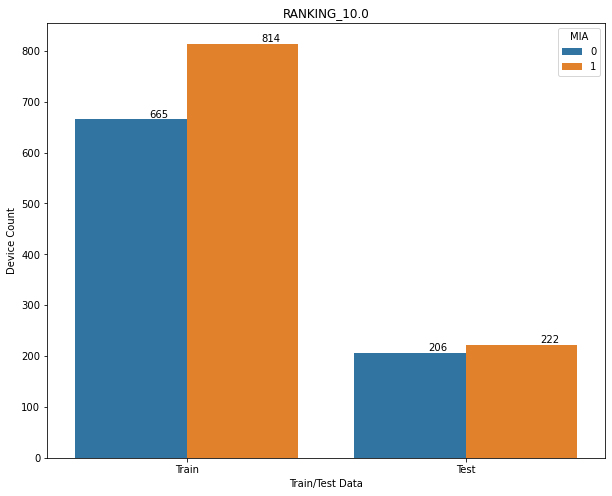

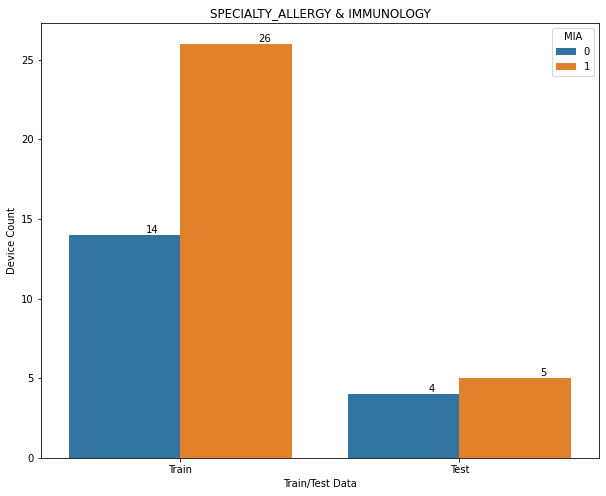

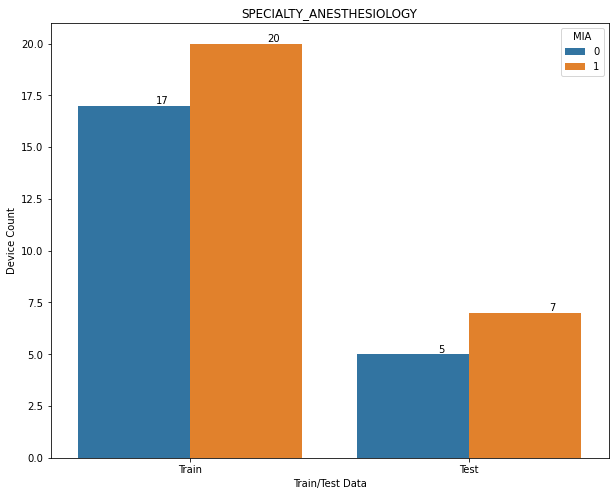

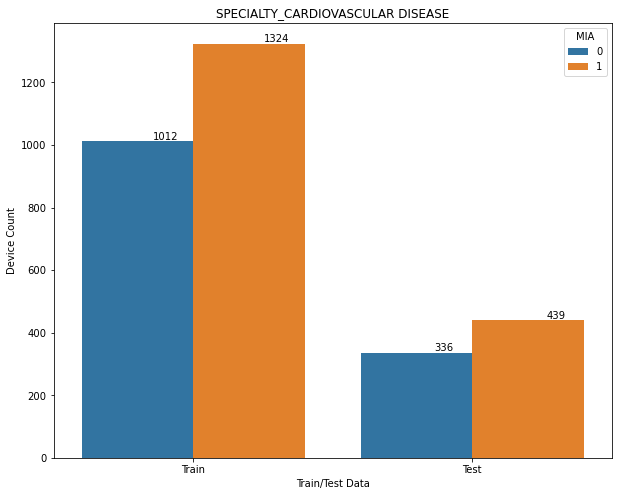

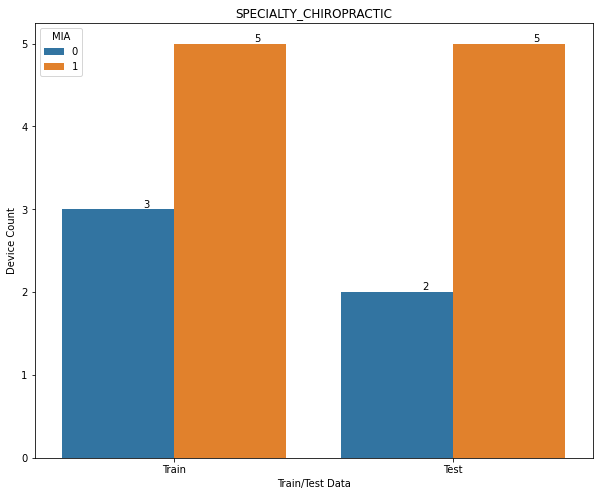

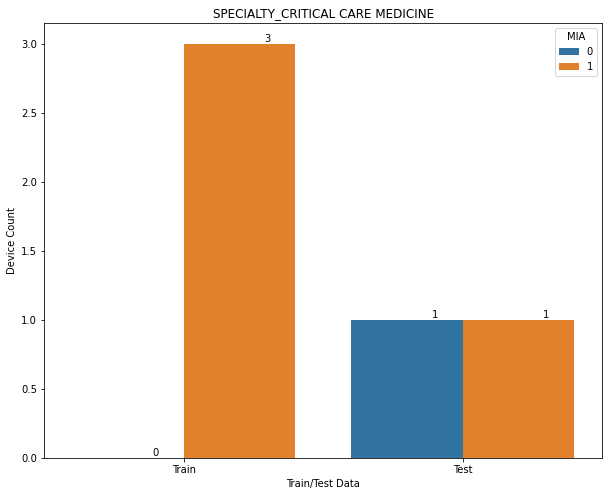

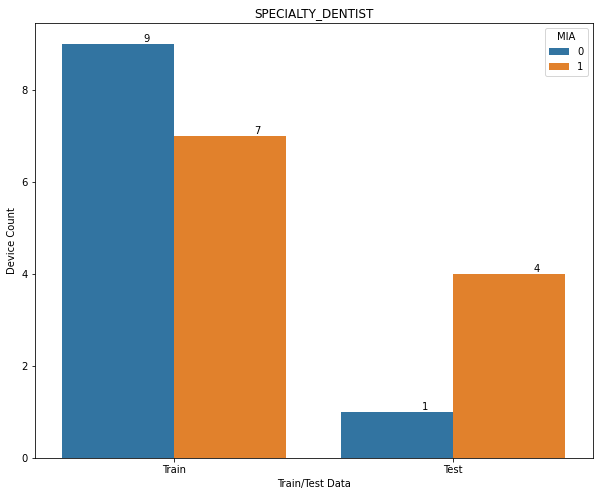

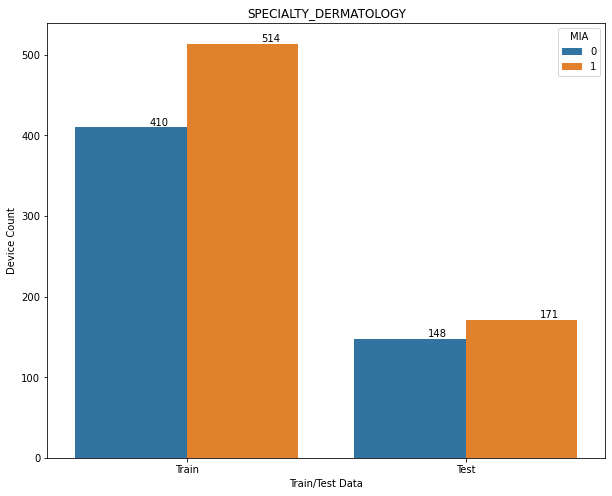

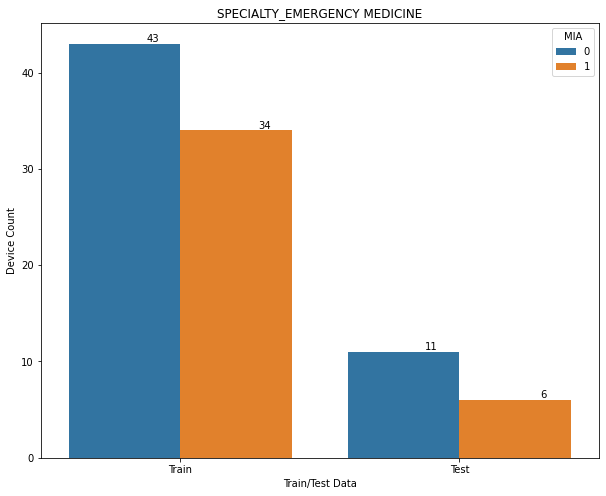

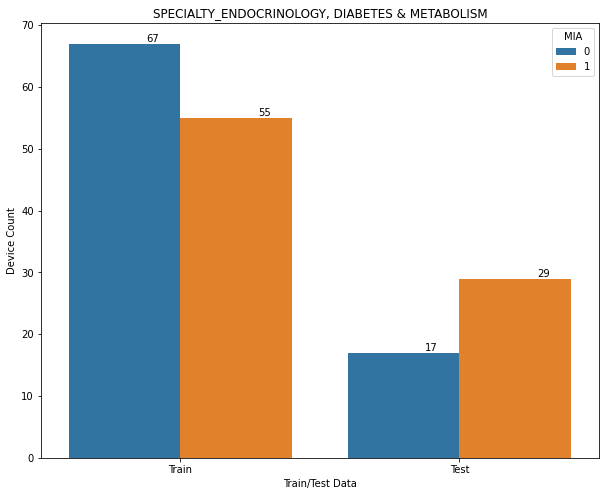

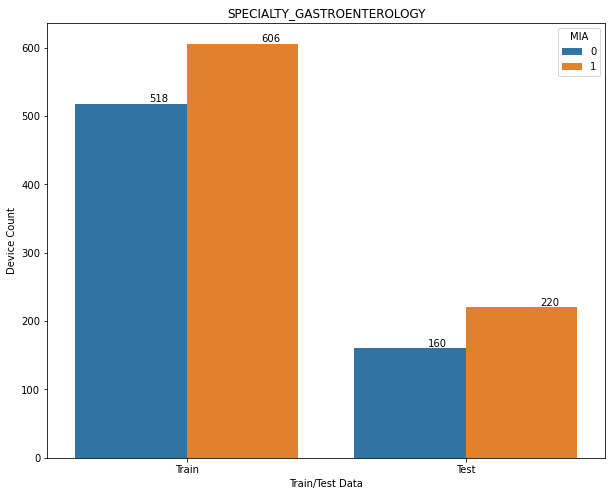

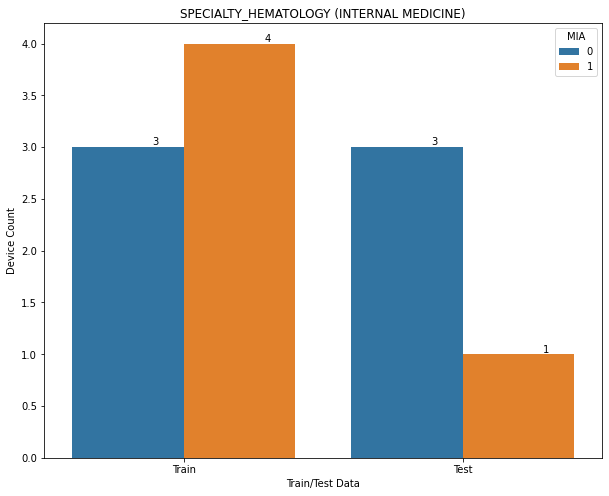

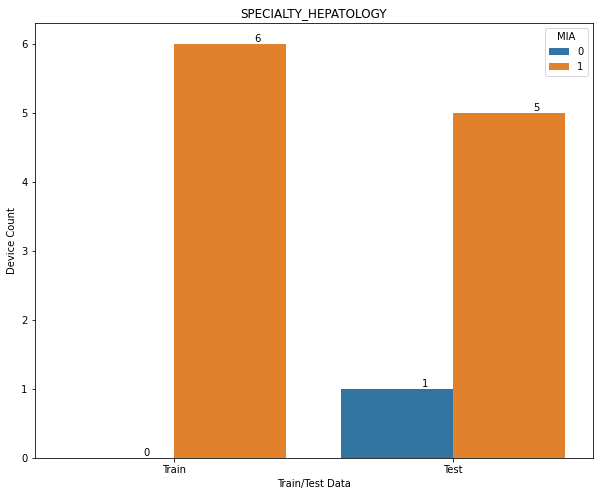

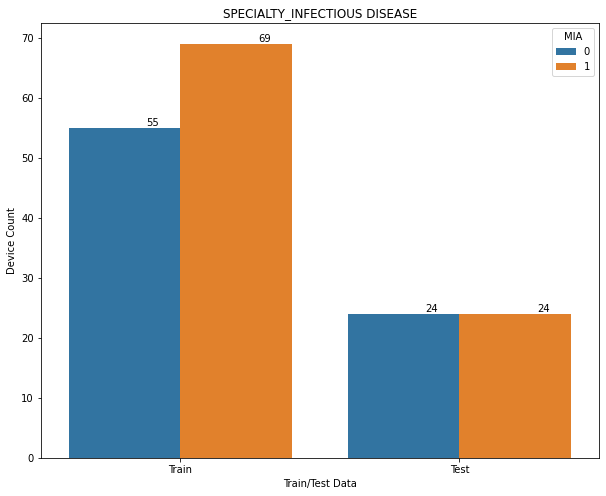

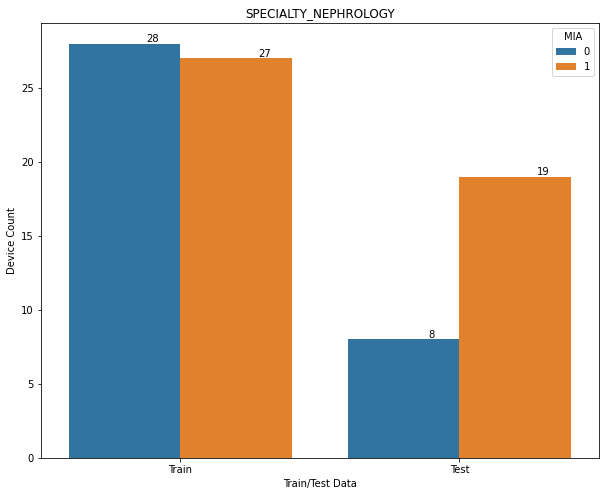

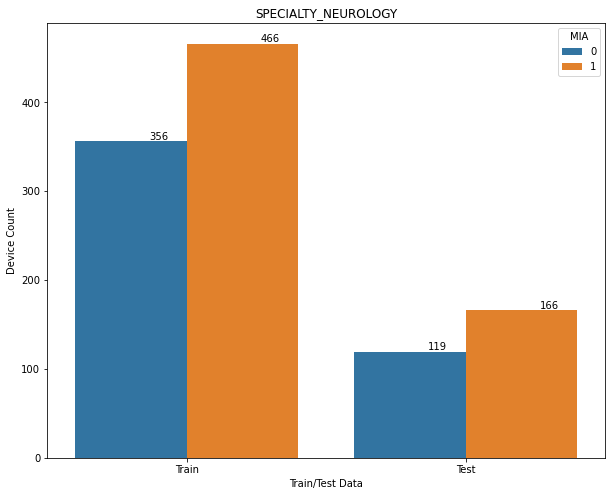

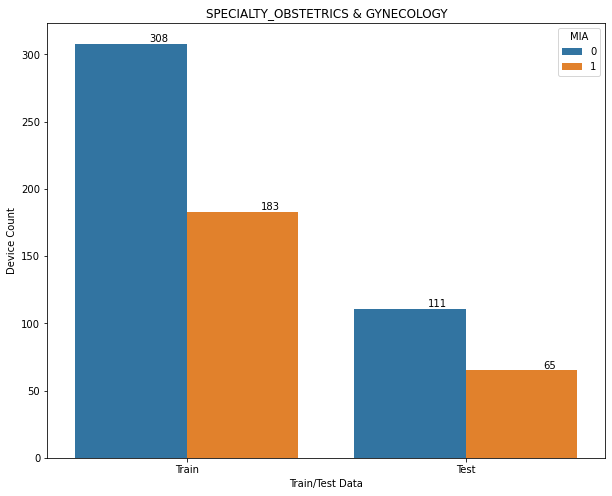

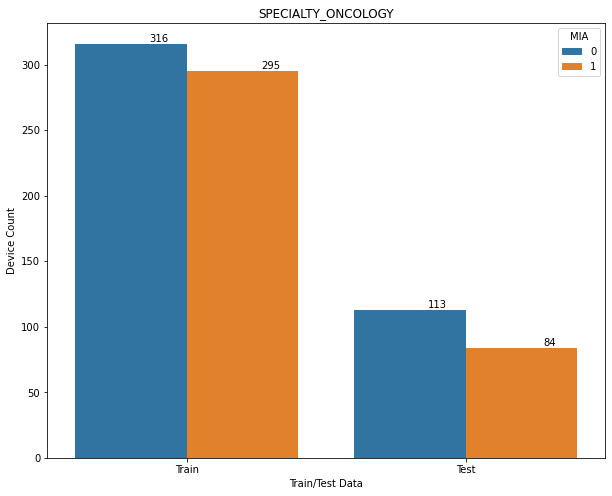

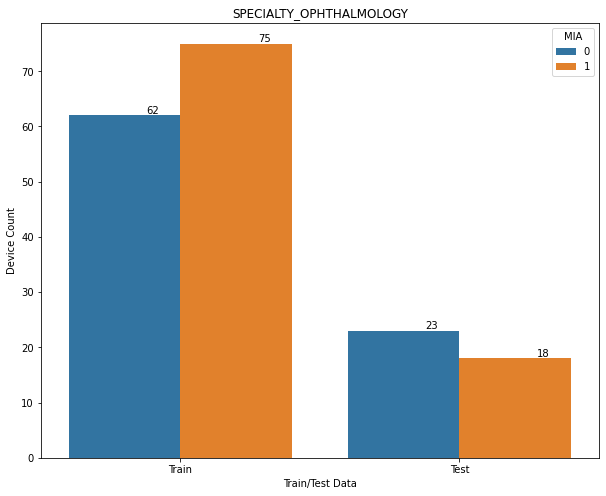

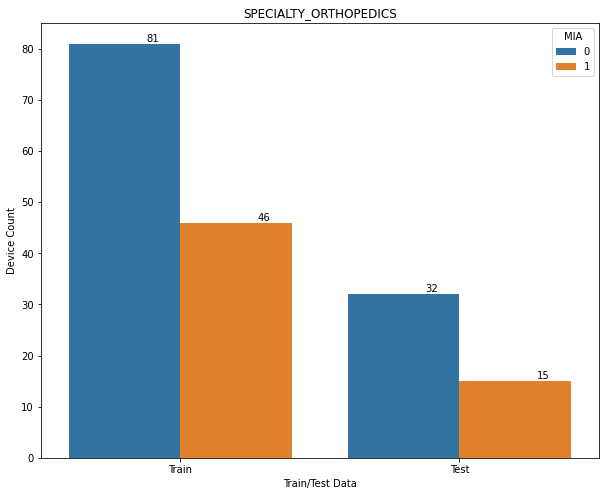

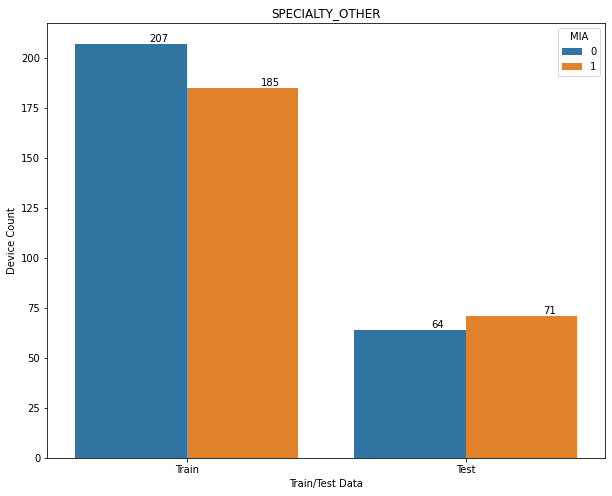

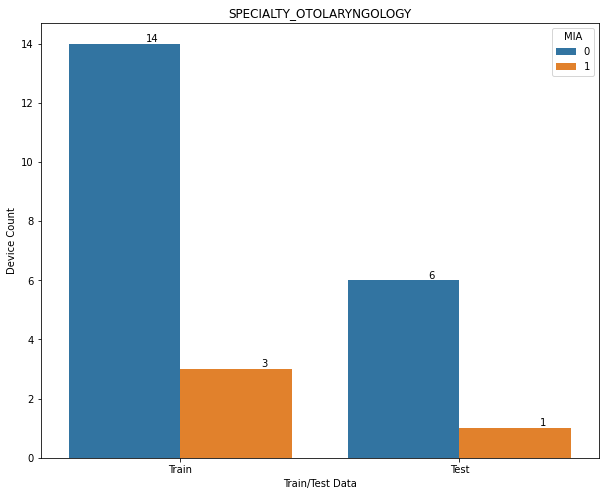

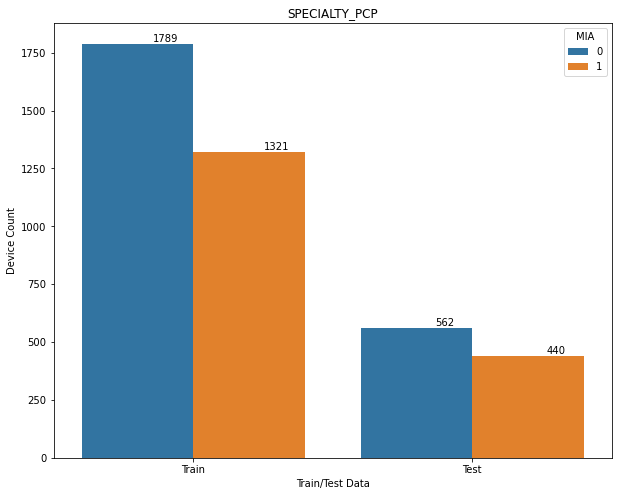

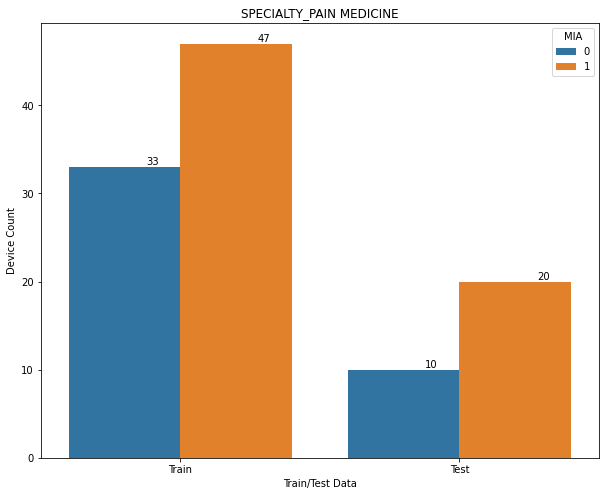

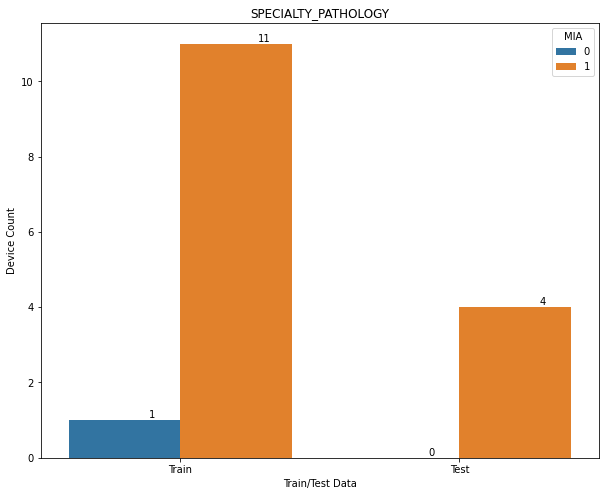

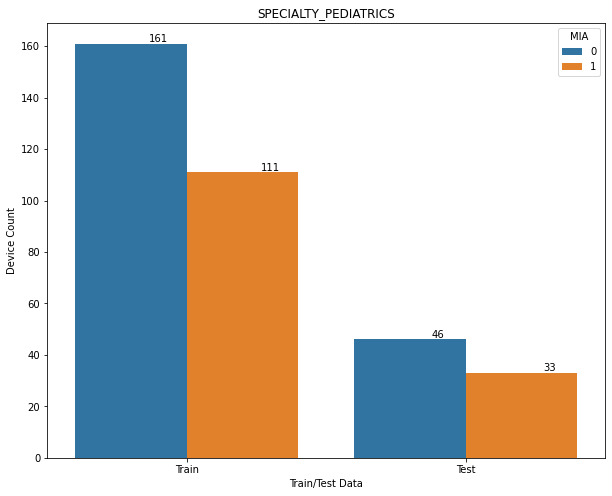

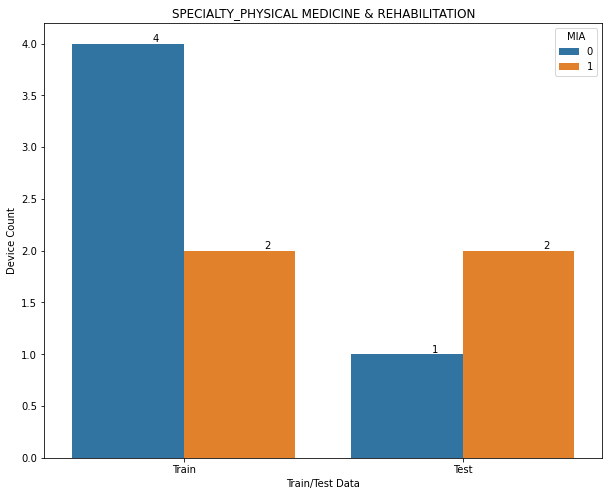

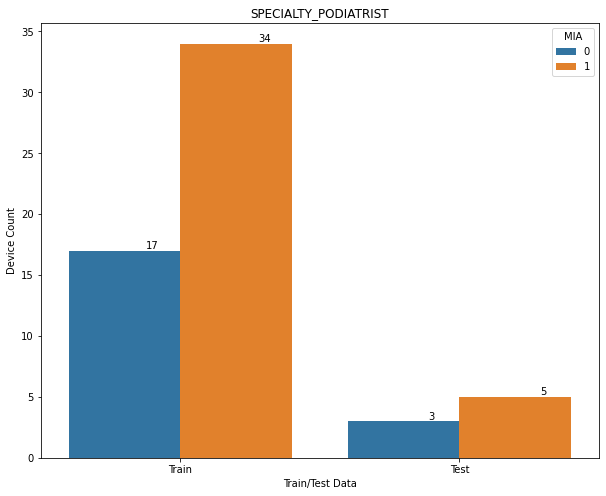

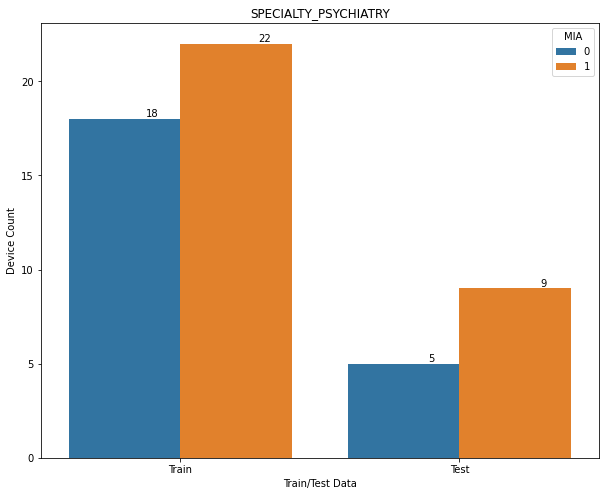

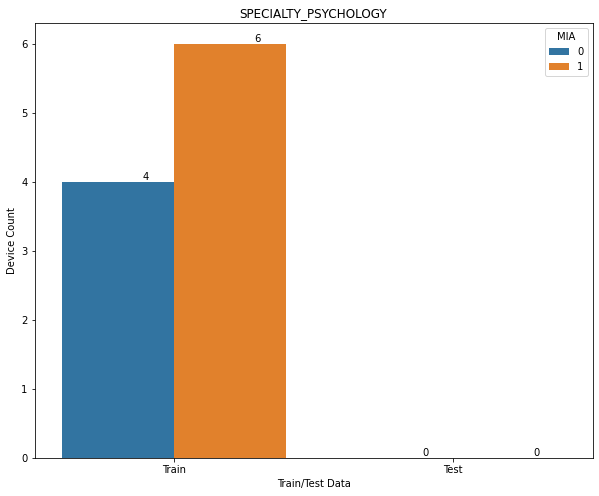

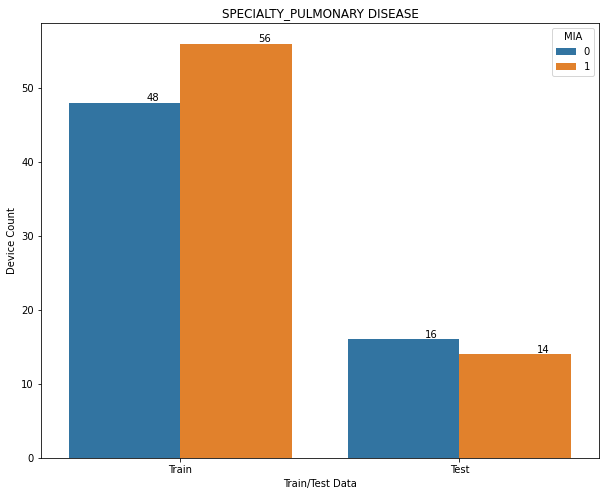

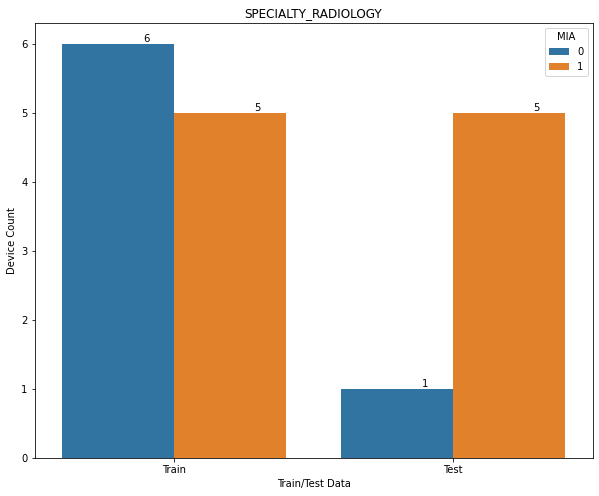

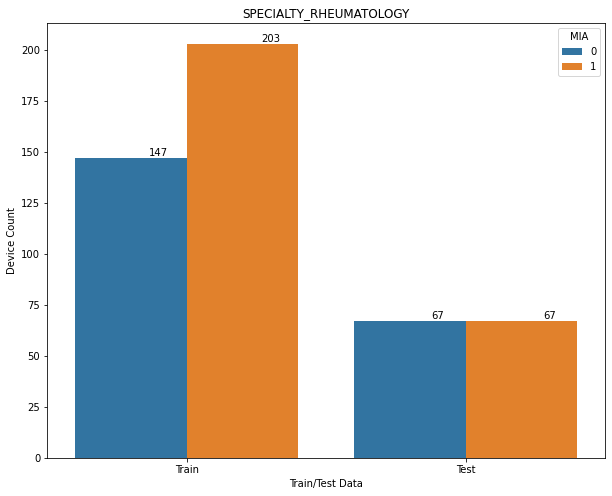

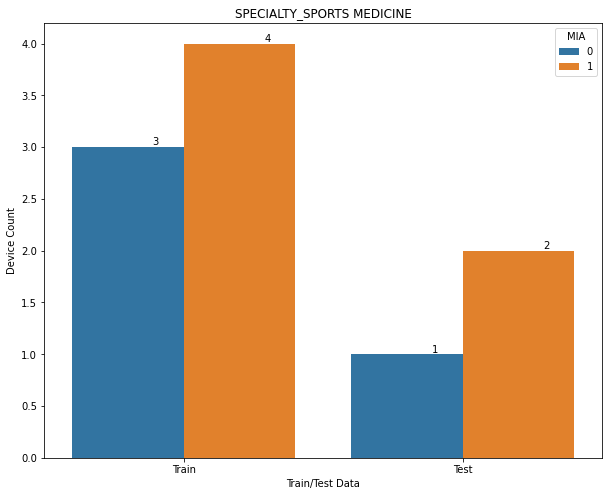

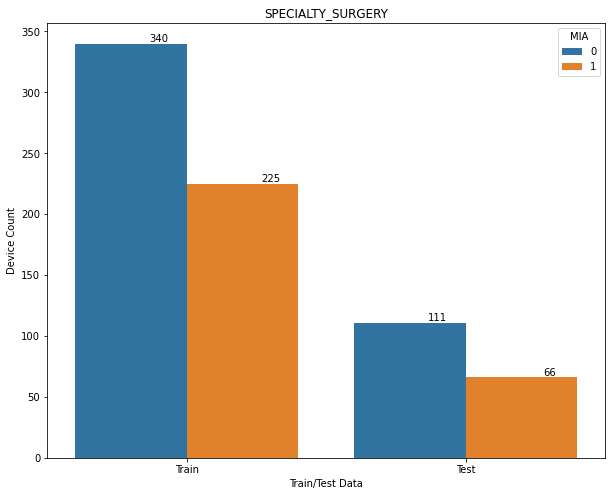

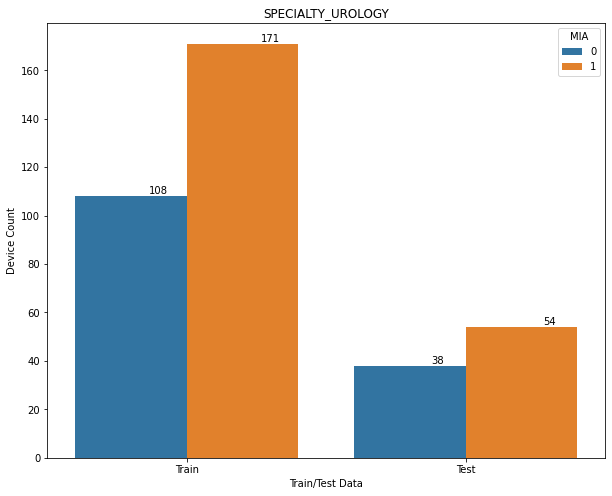

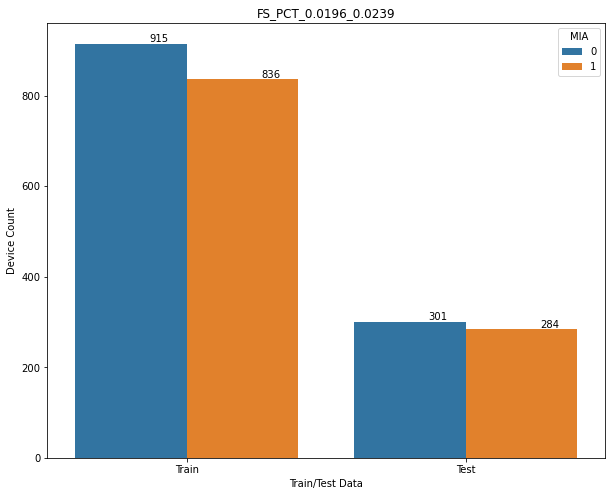

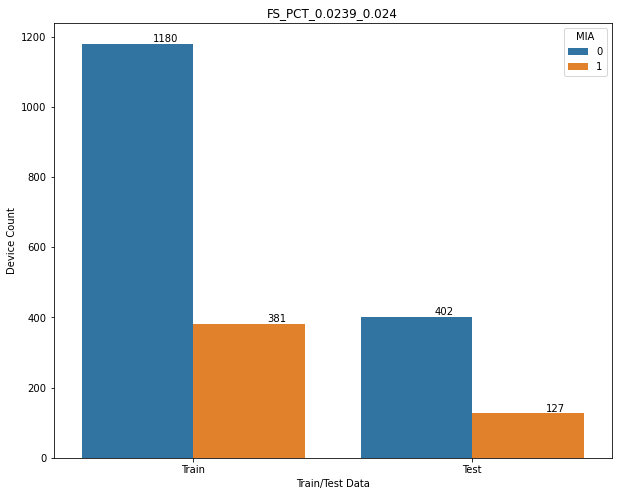

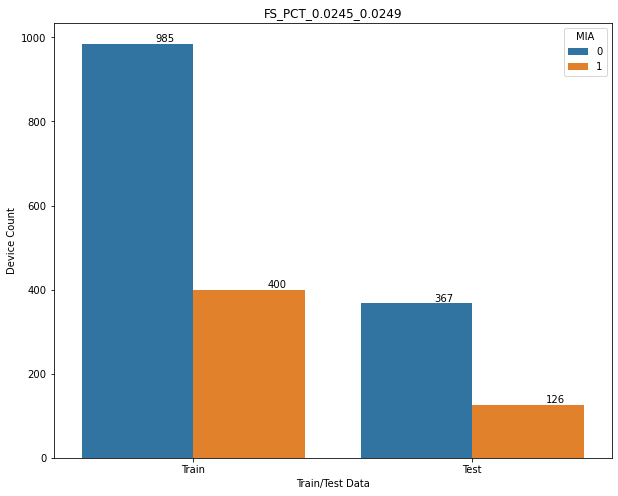

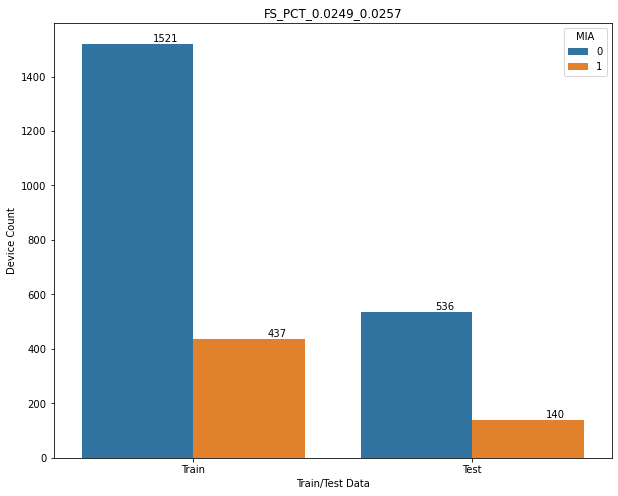

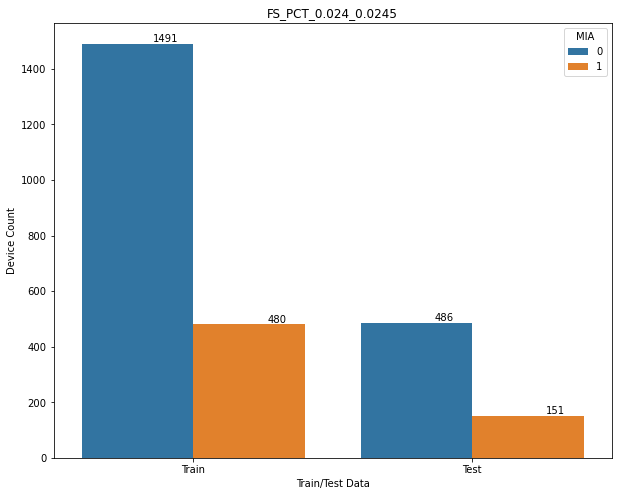

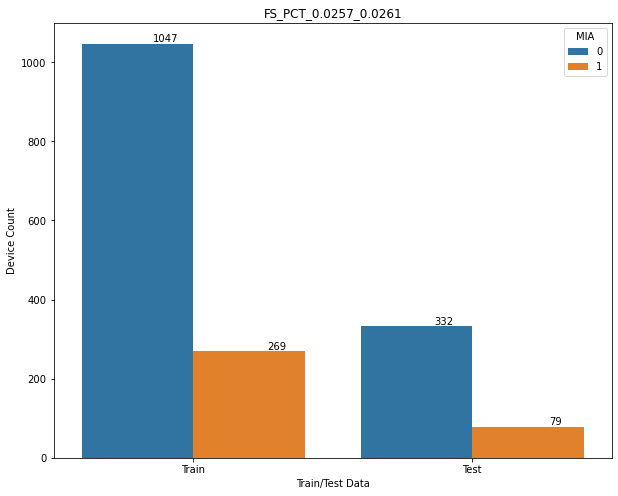

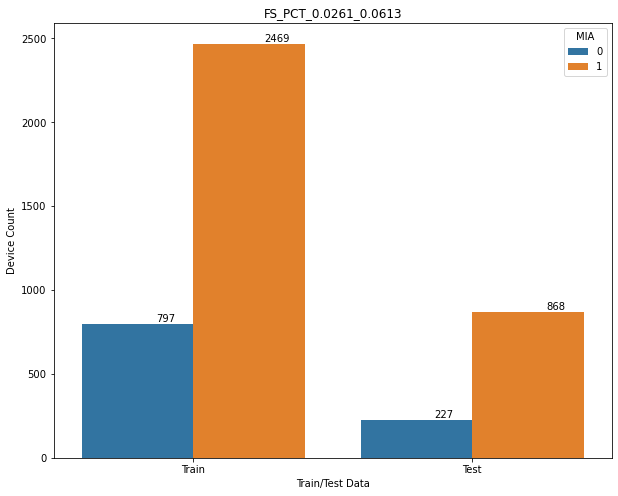

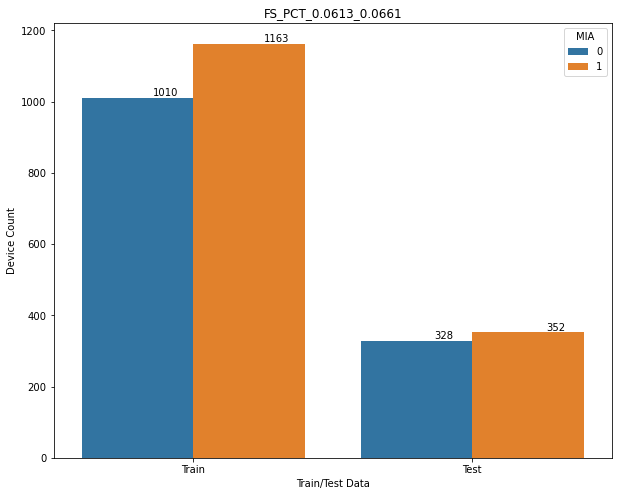

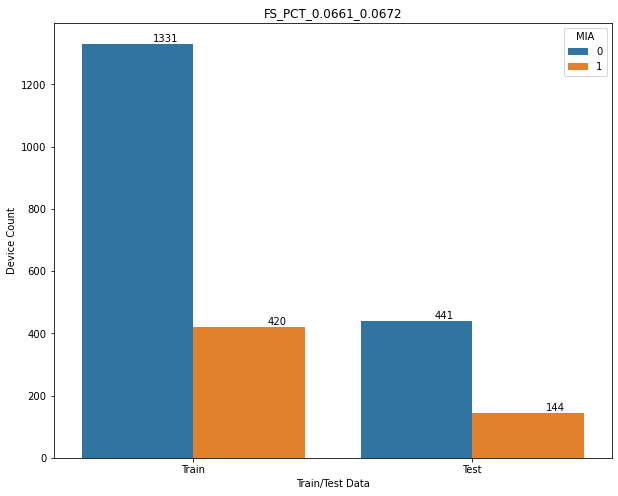

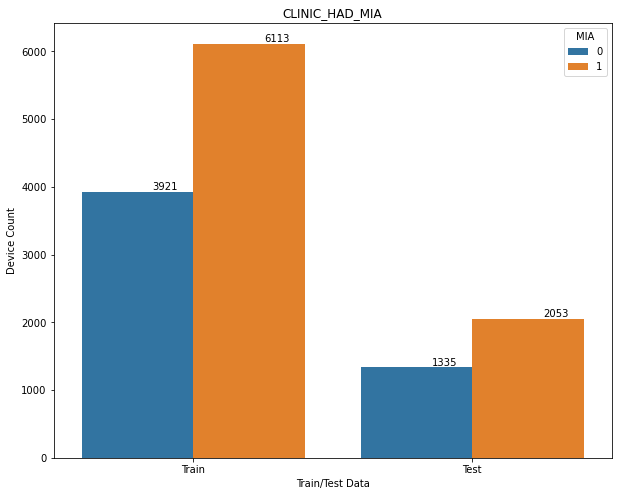

In [155]:
df_cat_eda = eda_cat_var(df_eda)

In [91]:
prev_train = df_cat_eda[df_cat_eda.Train == 'Train']
groupby_sum = pd.DataFrame(prev_train.groupby('Variable')['Device_count'].sum())
groupby_sum.reset_index(inplace = True)
prev_train = prev_train.merge(groupby_sum, how = 'left', left_on = 'Variable', right_on = 'Variable')
prev_train['prevalance_pct'] = (prev_train['Device_count_x']/prev_train['Device_count_y']) * 100

prev_train_cols = prev_train[(prev_train.prevalance_pct >= 80) & (prev_train.Device_count_x <200)]['Variable'].unique()
len(list(prev_train_cols))

15

In [92]:
prev_train_cols

array(['software_version_2.0.3', 'software_version_3.3.1',
       'software_version_3.5', 'software_version_4.10.1',
       'software_version_4.2.2', 'software_version_4.3.2',
       'software_version_4.3.3', 'software_version_4.5.1',
       'model_UIT232B-B06', 'sku_P-WAL-104-OUT-01',
       'is_battery_charging_False', 'specialty_Critical Care Medicine',
       'specialty_Hepatology', 'specialty_Otolaryngology',
       'specialty_Pathology'], dtype=object)

In [125]:
prev_test = df_cat_eda[df_cat_eda.Train == 'Test']
groupby_sum = pd.DataFrame(prev_test.groupby('Variable')['Device_count'].sum())
groupby_sum.reset_index(inplace = True)
prev_test = prev_test.merge(groupby_sum, how = 'left', left_on = 'Variable', right_on = 'Variable')
prev_test['prevalance_pct'] = (prev_test['Device_count_x']/prev_test['Device_count_y']) * 100

prev_test_cols = prev_test[prev_test.prevalance_pct >= 80]['Variable'].unique()
len(list(prev_train_cols))

28

In [129]:
pd.concat([prev_train,prev_test],axis = 0).to_csv('../prevalance_cat.csv')

In [126]:
len(list(set(list(prev_train_cols) + list(prev_test_cols))))

38

In [137]:
df_final = pd.concat([df_final_mia,df_final_nonmia],axis = 0)

In [72]:
# df_final.replace(np.nan,0,inplace = True)
# df_final.tail(5)

,asset_id,software_version_2.0.3,software_version_3.0.1,software_version_3.2,software_version_3.3.1,software_version_3.3.2,software_version_3.5,software_version_4.10.1,software_version_4.10.2,software_version_4.12.4,...,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist,avg_times,avg_days,clinic_had_mia,y_flag
19979,W01E105489,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
19980,W01E114229,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
19981,W01E132235,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
19982,W01E116427,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
19983,W01E134310,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [59]:
numeric_cols = [col for col in df_eda.columns if df_eda[col].dtype.name != 'category']
numeric_cols.remove('train')
numeric_cols

['asset_id',
 'avg_campaigns',
 'JUNE_avg_video_dispalys',
 'JUL_avg_video_dispalys',
 'AUG_avg_video_dispalys',
 'SEPT_avg_video_dispalys',
 'OCT_avg_video_dispalys',
 'NOV_avg_video_dispaly',
 'JUNE_avg_video_duration',
 'JUL_avg_video_duration',
 'AUG_avg_video_duration',
 'SEPT_avg_video_duration',
 'OCT_avg_video_duration',
 'NOV_avg_video_duration',
 'jun_avg_timeout_sessions',
 'jun_avg_Crash_sessions',
 'jun_avg_exit_sessions',
 'jul_avg_timeout_sessions',
 'jul_avg_Crash_sessions',
 'jul_avg_exit_sessions',
 'aug_avg_timeout_sessions',
 'aug_avg_Crash_sessions',
 'aug_avg_exit_sessions',
 'sept_avg_timeout_sessions',
 'sept_avg_Crash_sessions',
 'sept_avg_exit_sessions',
 'oct_avg_timeout_sessions',
 'oct_avg_Crash_sessions',
 'oct_avg_exit_sessions',
 'nov_avg_timeout_sessions',
 'nov_avg_Crash_sessions',
 'nov_avg_exit_sessions',
 'ABCDE Moles',
 'ADHD',
 'ALS',
 'Abdomen',
 'Acid Reflux',
 'Acne',
 'Acne Detailed',
 'Acute Bronchitis',
 'Adam Insulin ',
 'Advanced Atheroscl

In [138]:
df_eda_num = pd.merge(df_eda.loc[:,['asset_id','train','y_flag']],
                      df_final[numeric_cols],
                      how = 'left',
                      left_on = 'asset_id',
                      right_on = 'asset_id')
df_eda_num.head(2)

,asset_id,train,y_flag,avg_campaigns,JUNE_avg_video_dispalys,JUL_avg_video_dispalys,AUG_avg_video_dispalys,SEPT_avg_video_dispalys,OCT_avg_video_dispalys,NOV_avg_video_dispaly,...,Varicose Veins,Vasculature,Ventral Hernia,Ventricular Fibrillation with Conduction System,Wagner Classification,Warts on Skin,Whiteboard,Wrist,avg_times,avg_days
0,W01Y107687,Train,1,3.0,23.0,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0
1,W01E106713,Train,0,3.0,121.8,238.111111,405.692308,397.0,513.481481,537.086957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [139]:
df_eda_num_train = df_eda_num[df_eda_num.train == 'Train']
df_eda_num_train.drop('train',1,inplace = True)
df_eda_num_train_avg = pd.DataFrame(df_eda_num_train.groupby(['y_flag']).mean().T)
df_eda_num_train_median = pd.DataFrame(df_eda_num_train.groupby(['y_flag']).median().T)
df_eda_num_train_min = pd.DataFrame(df_eda_num_train.groupby(['y_flag']).min().T)
df_eda_num_train_max = pd.DataFrame(df_eda_num_train.groupby(['y_flag']).max().T)
# df_eda_num_train['Train'] = 'Train'

In [145]:
df_eda_num_train_f = pd.concat([df_eda_num_train_avg,df_eda_num_train_median],axis = 1)
df_eda_num_train_f = pd.concat([df_eda_num_train_f,df_eda_num_train_min],axis = 1)
df_eda_num_train_f = pd.concat([df_eda_num_train_f,df_eda_num_train_max],axis = 1)
df_eda_num_train_f.columns = df_eda_num_train_f.columns.astype(str)
df_eda_num_train_f['Train'] = 'Train'
df_eda_num_train_f.head(5)

y_flag,0,1,0,1,0,1,0,1,Train
avg_campaigns,3.129732,2.729605,3.000000,2.400000,1,1,9.33333,8.66667,Train
JUNE_avg_video_dispalys,150.346530,161.380387,105.090909,114.863636,0,0,1423.97,1426.43,Train
JUL_avg_video_dispalys,233.590722,196.107053,244.050000,214.407407,0,0,1396.39,1427.16,Train
AUG_avg_video_dispalys,287.354153,213.538524,274.214286,207.785714,0,0,1427.1,1429.48,Train
SEPT_avg_video_dispalys,310.294319,209.696514,345.159091,140.863636,0,0,1424.07,1424.87,Train


In [140]:
df_eda_num_test = df_eda_num[df_eda_num.train == 'Test']
df_eda_num_test.drop('train',1,inplace = True)
df_eda_num_test_avg = pd.DataFrame(df_eda_num_test.groupby(['y_flag']).mean().T)
df_eda_num_test_median = pd.DataFrame(df_eda_num_test.groupby(['y_flag']).median().T)
df_eda_num_test_min = pd.DataFrame(df_eda_num_test.groupby(['y_flag']).min().T)
df_eda_num_test_max = pd.DataFrame(df_eda_num_test.groupby(['y_flag']).max().T)

In [146]:
df_eda_num_test_f = pd.concat([df_eda_num_test_avg,df_eda_num_test_median],axis = 1)
df_eda_num_test_f = pd.concat([df_eda_num_test_f,df_eda_num_test_min],axis = 1)
df_eda_num_test_f = pd.concat([df_eda_num_test_f,df_eda_num_test_max],axis = 1)
df_eda_num_test_f.columns = df_eda_num_test_f.columns.astype(str)
df_eda_num_test_f['Train'] = 'Test'
df_eda_num_test_f.head(5)

y_flag,0,1,0,1,0,1,0,1,Train
avg_campaigns,3.128101,2.725258,3.000000,2.500000,1,1,8.5,8.83333,Test
JUNE_avg_video_dispalys,154.812201,163.337613,110.750000,118.386364,0,0,1389.67,765.833,Test
JUL_avg_video_dispalys,233.528188,199.337415,242.510870,220.000000,0,0,1395.55,690.13,Test
AUG_avg_video_dispalys,288.496332,218.057141,276.690476,220.023810,0,0,1395.71,904.333,Test
SEPT_avg_video_dispalys,312.178936,206.739652,347.727273,137.924825,0,0,1390.27,984.833,Test


In [147]:
pd.DataFrame(pd.concat([df_eda_num_train_f,df_eda_num_test_f],axis = 0)).to_csv('../prevalance_numeric.csv')

# Rough

In [89]:
df_curr[df_curr.asset_name == 'W01E120225'].sum(axis = 1)

2825    4
dtype: int64

In [60]:
# df_mia_redshift_wb['manufacturer'] = np.where((df_mia_redshift_wb['manufacturer'] == 'None'),
#                                                'unknown',
#                                                df_mia_redshift_wb['manufacturer'])

# df_mia_redshift_wb['model'] = np.where((df_mia_redshift_wb['model'] == 'None'),
#                                                'unknown',
#                                                df_mia_redshift_wb['model'])

# df_mia_redshift_wb['sku'] = np.where((df_mia_redshift_wb['sku'] == 'None'),
#                                                'unknown',
#                                                df_mia_redshift_wb['sku'])

# df_mia_redshift_wb['processor'] = np.where((df_mia_redshift_wb['processor'] == 'None'),
#                                                'unknown',
#                                                df_mia_redshift_wb['processor'])

# df_mia_redshift_wb['processor'] = np.where((df_mia_redshift_wb['processor'] == 'None'),
#                                                'unknown',
#                                                df_mia_redshift_wb['processor'])

In [ ]:
# labels = []
# for i in range(0,df_mia_redshift_wb_fs['fs_pct_quintile'].nunique()):
#     labels.append('fs_pct_'+str(round(df_mia_redshift_wb_fs['fs_pct_quintile'].unique().sort()[i].left,4))+
#                   '_'+ str(df_mia_redshift_wb_fs['fs_pct_quintile'].unique().sort()[i].right))
# # labels.sort()  
# bin_labels = labels

# df_mia_redshift_wb_fs['fs_pct_quintile_2'] = pd.qcut(df_mia_redshift_wb_fs['fs_pct'], q=10, precision=0,
#                                                     labels=bin_labels)